## Cobranzas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from datetime import timedelta
import seaborn as sns
#import glob as glob
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Letura de Bds por eficiencia

In [4]:
datas=pd.read_csv('C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/Exportes de Bd_cobranzas/data_con_drop_2.csv',sep=';',encoding='utf-8',dtype='str')
# salida=pd.read_csv('C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/Exportes de Bd_cobranzas/salida_limpia.csv',sep=';',encoding='utf-8',dtype='str')
# seguimiento=pd.read_csv('C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/seguimiento_v1.csv',sep=';',encoding='utf-8',dtype='str')
# virtuales=pd.read_csv('C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/Exportes de Bd_cobranzas/virtuales_2.csv',encoding='utf-8',sep=';')

In [5]:
df=datas.copy()
# out=salida.copy()
# seg=seguimiento.copy()
# vir=virtuales.copy()

### Tamaño de las Bds

In [5]:
vir.columns

Index(['Identificación', '# de suscripcion', 'Codigo de Gestion',
       '# de dias de mora', 'Calificación', 'Sistema Origen', 'Ciclo',
       'Fecha de Gestion', 'Fecha', 'Ano', 'mes', 'hora', 'dias', 'dias_Class',
       'cantidad', 'Reconta_class', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       'EMAIL ENTREGADO_sum', 'MENSAJE DE IVR ENTREGADO_sum',
       'MENSAJE DE TEXTO ENTREGADO_sum'],
      dtype='object')

In [6]:
df.columns

Index(['Unnamed: 0', 'Identificacion', '# de SuscripciÃ³n', 'Ciclo',
       'Elemento De Medicion', 'Fecha de Asignacion', 'Fecha Ult Gestion',
       'Usuario Grabador', '# servicio suscrito/abonado', 'Valor Total Cobrar',
       ...
       'DÃ­a Pago 2', 'DÃ­a Pago 3', 'Inscrito Factura Web', 'Queja',
       'Portafolio', 'Marca Score', 'Primera Mora', 'Analisis De Habito',
       'Sector b2b', 'Tipo de Cliente'],
      dtype='object', length=168)

In [7]:
seg.columns

Index(['Unnamed: 0', 'IDENTIFICACIÃ³N', '# DE SUSCRIPCION', 'FECHA DE GESTION',
       'USUARIO GRABADOR', 'CONSECUTIVO ADMINFO',
       'DESCRIPCION DE GESTION RESULTADO', 'CLASE DE GESTION', 'CAUSAL',
       'LINEA/AGENCIA/ABOGADO', 'NOMBRE GRABADOR', 'HORA DE INICIO GESTION',
       'HORA DE FIN GESTION', 'CICLO', 'DESCRIPCIÃ³N DEPARTAMENTO',
       'CONSECUTIVO TRASLADO', 'DURACION', 'NOTA', 'TELEFONOS',
       'SISTEMA ORIGEN'],
      dtype='object')

In [8]:
out.columns

Index(['Unnamed: 0', 'Identificacion Del Cliente', 'Grabador', 'Fecha_Gestion',
       'CICLO', 'PrimeroDeResultado de gestion', 'SumaDeValor Pendiente',
       'SumaDeValor Vencido', 'Fecha_Pago', 'SumaDeValor Pagado',
       'Tipo Efectivo', 'Vector', '% Pago Pendiente', '% Pago Vencido',
       'Dias Pago', 'Pago', 'Repetido', 'Efectivo Pago', 'Repetido CC',
       'Vlr_Recuperado', 'Unnamed: 19'],
      dtype='object')

In [9]:
print('tamaño de la Bd',out.shape),print('Id únicos',out['Identificacion Del Cliente'].nunique())

tamaño de la Bd (170295, 21)
Id únicos 131509


(None, None)

In [10]:
print('tamaño dae la Bd',seg.shape),print('Id únicos',seg['IDENTIFICACIÃ³N'].nunique())

tamaño dae la Bd (654844, 20)
Id únicos 385600


(None, None)

In [6]:
print('tamaño de la Bd',df.shape),print('Id únicos',df['Identificacion'].nunique())

tamaño de la Bd (326216, 103)
Id únicos 95504


(None, None)

### Fill data

In [7]:
df['Marca Score']=df['Marca Score'].str.strip().fillna('NO REGISTRA')
df['Marca Score'][df['Marca Score']==''] ='NO REGISTRA'
df['Analisis De Habito']=df['Analisis De Habito'].fillna('NO DEFINE')
df['Analisis De Habito'][df['Analisis De Habito']==' '] ='NO DEFINE'
df['Tipo de Cliente'][df['Tipo de Cliente']==' '] ='NO DEFINE'
df['Marca Funcional']=df['Marca Funcional'].str.replace(' ','0')
df['Marca']=df['Marca'].str.replace(' ','0')
df['Antiguedad Cliente'][df['Antiguedad Cliente']==' '] ='NO REGISTRA'
df['Perfil Digital']=df['Perfil Digital'].fillna('Sin perfil')
df['Nivel de riesgo experian']=df['Nivel de riesgo experian'].str.replace(' ','NO REGISTRA')
df['Nivel de Riesgo']=df['Nivel de Riesgo'].str.replace(' ','NO REGISTRA')
df['Nivel Estrategia Cobro']=df['Nivel Estrategia Cobro'].str.replace(' ','NO REGISTRA')
df['Real reportado en central de riesgos']=df['Real reportado en central de riesgos'].str.replace(' ','0')
df['Nivel de Riesgo'][df['Nivel de Riesgo']==' '] ='NO REGISTRA'
df['Estado del Cliente'][df['Estado del Cliente']==' '] ='SIN IDENTIFICAR'
df['TipificaciÃ³n Cliente'][df['TipificaciÃ³n Cliente']==' '] ='SIN IDENTIFICAR'
df['Estrategia'][df['Estrategia']==' '] ='SIN ESTRATEGIA'
df['Autopago'][df['Autopago']==' '] ='NO APLICA'
df['Tipo de Cliente']=df['Tipo de Cliente'].fillna('NO DEFINE')
df['Tipo de Reporte a Central de Riesgos'][df['Tipo de Reporte a Central de Riesgos']==' '] ='NO REGISTRA'
df['Codigo edad de mora(para central de riesgos)']=df['Codigo edad de mora(para central de riesgos)'].str.replace(' ','NO REGISTRA').value_counts()

### Limpieza de vectores

In [8]:
df['AnÃ¡lisis Vector'][df['AnÃ¡lisis Vector']==' '] ='SIN IDENTIFICAR'
df['Análisis Vector_PAGOS_PARCIAL'] = np.where(df['AnÃ¡lisis Vector'].str.contains("PAGO PARCIAL|PAGOS PARCIAL"),"1",'0')
df['Análisis Vector_PAGO OPORTUNO'] = np.where(df['AnÃ¡lisis Vector'].str.contains("SIN PAGO|FINANCIAR"),"1",'0')
df['Análisis Vector_SIN_IDENTIFICAR'] = np.where(df['AnÃ¡lisis Vector'].str.contains("SIN IDENTIFICAR"),"1",'0')
df['Análisis Vector_SIN_PAGO'] = np.where(df['AnÃ¡lisis Vector'].str.contains("SIN PAGO|FINANCIAR"),"1",'0')
df['Análisis Vector_suspension'] = np.where(df['AnÃ¡lisis Vector'].str.contains("SUSPENSIO"),"1",'0')
df['Análisis Vector_indeterminado'] = np.where(df['AnÃ¡lisis Vector'].str.contains("PAGO OPORTUNO Y NO OPORTUNO"),"1",'0') 
df['Análisis Vector_pago_no_oport'] = np.where(df['AnÃ¡lisis Vector'].str.contains("PAGO NO OPORTUNO"),"1",'0')
df['Análisis Vector_otro_caso'] = np.where(df['AnÃ¡lisis Vector'].str.contains("NUEVO|FACTURAS AJUSTADAS|PROBLEMAS RECLAMACION"),"1",'0')
df['Vector Cualitativo # SuscripciÃ³n'][df['Vector Cualitativo # SuscripciÃ³n']==' '] = df["Vector Cualitativo # SuscripciÃ³n"].mode()[0]

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Parse dates

In [9]:
df['Fecha Ult Gestion']=pd.to_datetime(df['Fecha Ult Gestion'],format='%Y-%m-%d') 
df['Fecha de Asignacion']=pd.to_datetime(df['Fecha de Asignacion'],format='%Y-%m-%d %H:%M:%S')
df['Fecha Ult pago']=pd.to_datetime(df['Fecha Ult pago'],format ='%Y-%m-%d %H:%M:%S',errors = "coerce")
df['Fecha de cuenta de cobro mas antigua']=pd.to_datetime(df['Fecha de cuenta de cobro mas antigua'],format ='%Y-%m-%d %H:%M:%S',errors = "coerce")
df["Dias_ult_pago"] = (df['Fecha Ult pago']).dt.day
df["dia_semana_ult_pago"] = (df['Fecha Ult pago']).dt.weekday
df["mes_ult_pago"]=df["Fecha Ult pago"].dt.month
df["semana_ult_pago"]=df["Fecha Ult pago"].dt.week
df["trimestre_ult_pago"] = df["Fecha Ult pago"].dt.quarter
df["año_ult_pago"] = df["Fecha Ult pago"].dt.year
df["DIAS_desde_ult_pago"] = (df["Fecha Ult Gestion"] - df["Fecha Ult pago"]).dt.days
df["Fecha estado corte"]=pd.to_datetime(df["Fecha estado corte"],format ='%Y-%m-%d %H:%M:%S',errors = "coerce")
df["dias_ult_pago_cobro"] = (df["Fecha Ult pago"]-df["Fecha estado corte"]).dt.days
df["dias_ult_pago_fac_ant"] = (df["Fecha Ult pago"]-df["Fecha de cuenta de cobro mas antigua"]).dt.days
df['Fecha de Asignacion_mes']=df["Fecha de Asignacion"].dt.month
df['Fecha de Instalacion']=pd.to_datetime(df['Fecha de Instalacion'],format ='%Y-%m-%d %H:%M:%S',errors = "coerce")
df['antiguedad_mes']=(dt.datetime.now()-df['Fecha de Instalacion']).dt.days/365
df['Fecha Retiro']=pd.to_datetime(df['Fecha Retiro'].str.replace('4732','2020'),format='%Y-%m-%d',errors = "coerce")
df['Fecha Vencimiento Sin Recargo']=pd.to_datetime(df['Fecha Vencimiento Sin Recargo'],format='%Y-%m-%d')

In [10]:
df['dias_desde_ult_gestion']=(dt.datetime.now()-df['Fecha Ult Gestion']).dt.days

## Descripción subcategoria

In [11]:
df['Descripcion subcategoria']=df['Descripcion subcategoria']\
                .str.replace('Consumos EPM Telco|INALAMBRICOS NO JAC|unica|COMERCIAL|ENTERPRISE|MONOPRODUCTO|PYME|------------------------------|LINEA BUZON','NO REGISTRA')\
                .str.replace('ESTRATO MEDIO ALTO|MEDIO ALTO','ESTRATO 4')\
                .str.replace('ESTRATO ALTO|ALTO','ESTRATO 6')\
                .str.replace('ESTRATO MEDIO-BAJO|MEDIO BAJO','ESTRATO 2')\
                .str.replace('ESTRATO MEDIO|MEDIO','ESTRATO 3')\
                .str.replace('ESTRATO MEDIO-BAJO|MEDIO BAJO','ESTRATO 2')\
                .str.replace('BAJO BAJO|ESTRATO BAJO-BAJO|ESTRATO BAJO|BAJO','ESTRATO 1')
df['Descripcion subcategoria'][df['Descripcion subcategoria']=='-'] ='NO REGISTRA' ## No registra
df['TipificaciÃ³n Cliente'][df['TipificaciÃ³n Cliente']==' '] = df["TipificaciÃ³n Cliente"].mode()[0] ## reemplazo con la moda

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Descripción del producto

In [ ]:
df['Descripcion producto']=df['Descripcion producto'].str.replace('-','').str.strip().str.upper()\
    .str.replace('TELEVISION UNE|TELEVISION INTERACTIVA|TV CABLE|TV INTERACTIVA|UNE TV|TELEVISION SIN SEÃƑÂ‘AL|TELEVISION SIN SEÃƑÂ‘AL|TV CABLE SIN SEÃƒÂ‘AL','TELEVISION')\
        .str.replace('INTERNET BANDA ANCHA|SEGUNDA CONEXION INTERNET|BANDA ANCHA|INTERNET EDATEL|INTERNET INSTANTANEO|CABLE MODEM|INTERNET DEDICADO 11|ADSL BASICO','INTERNET')\
            .str.replace('UNE MOVIL|COLOMBIAMOVIL BOGOTA|TIGO|ETB','UNEMOVIL')\
                .str.replace('TOIP|TELEFONICA  TELECOM|TELECOM|TO_SINVOZ','TELEFONIA')\
                    .str.replace('LÃƑÂ­NEA BÃƑÂ¡SICA','LINEA BASICA')

In [18]:
df['Descripcion categoria']=df['Descripcion categoria'].str.replace("[^a-zA-Z ]+", "NO REGISTRA")
df['Descripcion producto']=df['Descripcion producto'].str.replace('-','').str.strip()\
    .str.replace('TELEVISION UNE|Television Interactiva|TV CABLE |TV INTERACTIVA|UNE TV|TELEVISIONSIN SEÃƒÂ‘AL','TELEVISION')\
        .str.replace('Internet Banda Ancha|Internet EDATEL|CABLE MODEM','INTERNET').str.replace('UNE MOVIL','UNEMOVIL')\
            .str.replace('UNE MOVIL|COLOMBIAMOVIL BOGOTA','UNEMOVIL')\
                .str.replace('TOIP','TELEFONIA')

In [19]:
df['Descripcion producto']=df['Descripcion producto'].str.strip().str.replace('-','')\
    .str.replace('TELEVISION UNE|Television Interactiva|TV CABLE |TV INTERACTIVA|UNE TV','TELEVISION')\
        .str.replace('Internet Banda Ancha','INTERNET').str.replace('UNE MOVIL','UNEMOVIL')
conteo3=df['Descripcion producto'].value_counts().iloc[:7].index.tolist()
df['Descripcion producto_resumen']=df.apply(
    lambda row: row['Descripcion producto']  if (row['Descripcion producto'] in conteo3)
     else 'OTRO PRODUCTO',axis=1)
df['Descripcion producto_resumen']=df['Descripcion producto_resumen'].str.strip()
df['Tipo Contactabilidad'][df['Tipo Contactabilidad']==' '] ='NO REGISTRA'
df['Indicador BI'][df['Indicador BI']==' '] ='NO REGISTRA'

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Segmento por antiguedad

In [20]:
df['antiguedad_mes']=df['antiguedad_mes'].astype(int)
col         = 'antiguedad_mes'
condi = [ df[col] < 12, df[col].between(12, 24, inclusive = True),df[col]>24 ]
seg_     = [ "SEGMENTO YOUNG", 'SEGMENTO MASTER','SEGMENTO LEGEND'] 
df["Hogar"] = np.select(condi, seg_, default=np.nan)

In [21]:
df['CalificaciÃ³n A Nivel De SuscripciÃ³n'][df['CalificaciÃ³n A Nivel De SuscripciÃ³n']==' ']=df['CalificaciÃ³n A Nivel De SuscripciÃ³n'].mode()[0]
df['CalificaciÃ³n A Nivel De SuscripciÃ³n']=df['CalificaciÃ³n A Nivel De SuscripciÃ³n'].astype('int')
df['Califica_suscr_class']=pd.cut(df['CalificaciÃ³n A Nivel De SuscripciÃ³n'],bins=5)

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Tipo de documento

In [ ]:
df['Tipo De Documento'][df['Tipo De Documento']=='13'] ='NO REGISTRA'
df['Tipo De Documento']=df['Tipo De Documento'].fillna('NO REGISTRA')
df['Tipo De Documento'][df['Tipo De Documento']=='1'] ='CC'
df['Tipo De Documento'][df['Tipo De Documento']==' '] ='NO REGISTRA'
df['Tipo De Documento'][df['Tipo De Documento']=='C'] ='NO REGISTRA'
df['Tipo De Documento']=df['Tipo De Documento'].str.replace('3 Cedula Extranjeria|3|1CE','CE')\
                                                .str.replace('1 Cedula','CC')\
                                                .str.replace('2 Nit|2',' Nit')\
                                                .str.replace('4 Tarjeta de Identidad|4',' TI')      

### Banco 1 y 2

In [ ]:
df['Banco 1'][df['Banco 1']==' '] ='NO REGISTRA'
df['Banco 2'][df['Banco 2']==' '] ='NO REGISTRA'
df['Banco 1'].fillna('NO REGISTRA',inplace=True)
df['Banco 2'].fillna('NO REGISTRA',inplace=True)

In [ ]:
df['Banco 1']=df['Banco 1'].str.upper().str.strip()
df['Banco 2']=df['Banco 2'].str.upper().str.strip()
df['Banco 1']=df['Banco 1'].str.replace('BANCO COLPATRIA','COLPATRIA')\
                            .str.replace('COLPATRIA ENLINEA','COLPATRIA EN LINEA')\
                            .str.replace('GANA GANA','GANA')\
                            .str.replace('GANA GANA','GANA')

In [ ]:
df["Banco 1_virtual"] =\
        np.where(df["Banco 1"].str.contains("LINEA|PSE|BOTON",regex = True,na = False),"1","0")
df["Banco 2_Virtual"] =\
        np.where(df["Banco 2"].str.contains("LINEA|PSE|BOTON",regex = True,na = False),"1","0")

In [ ]:
conteo_banco=df['Banco 1'].value_counts().iloc[:10].index.tolist()
df['Banco 1_Cl']=df.apply(
    lambda row: row['Banco 1']  if (row['Banco 1'] in conteo_banco)
     else 'OTRO BANCO',axis=1)
conteo_banco2=df['Banco 2'].value_counts().iloc[:10].index.tolist()
df['Banco 2_Cl']=df.apply(
    lambda row: row['Banco 2']  if (row['Banco 2'] in conteo_banco2)
     else 'OTRO BANCO',axis=1)

### Limpieza de causal

In [ ]:
df['Causal'][df['Causal']==' '] ='NO REGISTRA'
df['Causal_Cl']=df['Causal']\
.str.replace('FACTURA MAYOR A LA CAPACIDAD DE PAGO|CLIENTE SE ACOGE PRODUCTO MINIMO VITAL|PRIORIDAD INGRESOS A LA CANASTA BASICA|INDISPONIBILIDAD DE MEDIOS DE PAGO POR EMERGENCIA SANITARIA|NO TIENE DINERO|INCONVENIENTES ECONOMICOS|INCONVENIENTES ECONOMICOS|CONTINGENCIA COVID-19|DESEMPLEADO|INDEPENDIENTE SIN INGRESOS DURANTE CUARENTENA|DISMINUCIÃ“N INGRESOS / INCONVENIENTES CON NÃ“MINA',
             'DISMINUCIÓN DE INGRESOS')\
.str.replace('OLVIDO DE PAGO|FUERA DE LA CIUDAD|DEUDOR SE OLVIDO DEL PAGO|OLVIDO DEL PAGO / ESTA DE VIAJE',
             'OLVIDO')\
.str.replace('PAGA CADA DOS MESES|PAGO BIMESTRAL','PAGO BIMESTRAL')\
.str.replace('INCONFORMIDAD EN EL VALOR FACTURADO|INCONFORMIDAD POR CAMBIO DE DOMICILIO|INCOMFORMIDAD POR CAMBIO DE DOMICILIO|PQR PENDIENTE|TIENE RECLAMO PENDIENTE','INCONFORMIDAD')\
.str.replace('OTRA PERSONA ES LA ENCARGADA DEL PAGO','OTRA PERSONA ES LA ENCARGADA DEL PAGO').str.strip()\
.str.replace('PROBLEMAS FACTURACIÓN|INCONSISTENCIAS EN CARGOS FACTURADOS|RECLAMACIÃ“N EN TRÃMITE|NO LE LLEGA LA FACTURA / LLEGO DESPUES DE LA FECHA DE VENCIMIENTO|LLEGO LA FACTURA DESPUES DE LA FECHA DE VENCIMIENTO|NO LLEGO FACTURA',
             'FACTURA')\
.str.replace('SE NIEGA A RECIBIR INFORMACION',
             'RENUENTE')\
.str.replace('INCONVENIENTES CON CANALES DE PAGO|NO HAY PROGRAMACION DEL PAGO|INCONVENIENTES CON EL CANAL DE RECAUDO|NO HAY PROGRAMACION DEL PAGO|INCONVENIENTES CON LA ENTIDAD BANCARIA',
             'INCONVENIENTES CON PAGO')\
.str.replace('REALIZARA RETIRO DEL SERVICIO|REALIZARA RETIRO / CANCELACION SERVICIO',
             'REALIZARA RETIRO')

In [ ]:
conteo_Causa=df['Causal_Cl'].value_counts().iloc[:12].index.tolist()
df['Causal_Cl']=df.apply(
    lambda row: row['Causal_Cl']  if (row['Causal_Cl'] in conteo_Causa)
     else 'OTRA CAUSA',axis=1)

### Estado de corte

In [ ]:
conteo_Corte=df['Descripcion estado de corte'].value_counts().iloc[:12].index.tolist()
df['Descripcion estado de corte_Cl']=df.apply(
    lambda row: row['Descripcion estado de corte']  if (row['Descripcion estado de corte'] in conteo_Corte)
     else 'OTRA MOTIVO',axis=1)

In [ ]:
df['Descripcion estado de corte_conexión'] = np.where(df['Descripcion estado de corte'].str.contains("CONEXION"),"1",'0')
df['Descripcion estado de corte_suspención'] = np.where(df['Descripcion estado de corte'].str.contains("SUSPENSION"),"1",'0')
df['Descripcion estado de corte_retiro'] = np.where(df['Descripcion estado de corte'].str.contains("RETIRO"),"1",'0')

In [ ]:
df['Valor Total Cobrar']=df['Valor Total Cobrar'].astype('float64')
df['Valor Vencido']=df['Valor Vencido'].astype('float64')
df['Valor Factura']=df['Valor Factura'].astype('float64')
df['Valor Intereses de Mora']=df['Valor Intereses de Mora'].astype('float64')
df['Valor financiado']=df['Valor financiado'].astype('float64')

In [ ]:
df[df.filter(like='alor').columns].info()

## Días suspensión

In [28]:
df['Dias Suspension'][df['Dias Suspension']==' ']=0
df['Dias Suspension']=df['Dias Suspension'].astype('int')

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df[['Codigo Categoria','Codigo de Gestion','Codigo de plan de facturacion',
         'Codigo edad de mora(para central de riesgos)','Codigo de plan de facturacion',
         'Codigo estado de corte','Codigo producto','Codigo Subcategoria','Consecutivo Adminfo',
         'Consecutivo de la Tarea','Consecutivo de la Tarea','# Cuenta De Cobro','Cuenta de Libro Mayor',
         'Cuentas con Saldo','Descripcion Barrio de Instalacion',
         'Descripcion plan de facturacion','Descripcion traslado','Agencia B2B Convergente',
         'Archivo Convergente','Tipo Cliente Especial','Consecutivo Traslado','Linea/Agencia/Abogado',
         'Cantidad de Reclamos','Cartera Castigada','Castigo Suscripcion','Sector b2b',
         'Celular','Marca','Marca Funcional','PQR Activo','Num SS','Gestion comercial','Alto valor',
         'Excepciones en Asignacion','Estado Adminfo','Score','Usuario Dueno Tarea','Vector de Pago',
        'Queja','Portafolio','Minimo Estado de Corte por SuscripciÃ³n','Usuario Proceso','Score',
         'Elemento De Medicion','Estado SS','# Referente de Pago','# Factura','Estado SS','# Referente de Pago'
        ,'Director','Ejecutivo','Unnamed: 0','Vector A Nivel Servicio Suscrito','Ejecutivo de servicios',
         'Vector A Nivel Servicio Suscrito','Asesor de Reclamos','Segmento','Ejecutivo de servicios',
         'Codigo Barrio de Instalacion','Codigo Fraude','Factura de Cobro Devuelta',
         'DescripciÃ³n Localidad TelÃ©fono Ultima GestiÃ³n','DescripciÃ³n Departamento TelÃ©fono Ultima GestiÃ³n',
       'DescripciÃ³n Localidad TelÃ©fono con Mejor Contactabilidad','Reporte',
          'DescripciÃ³n Departamento TelÃ©fono Ultima GestiÃ³n','Codigo de localidad','Traslado']].head(2)

,Codigo Categoria,Codigo de Gestion,Codigo de plan de facturacion,Codigo edad de mora(para central de riesgos),Codigo de plan de facturacion,Codigo estado de corte,Codigo producto,Codigo Subcategoria,Consecutivo Adminfo,Consecutivo de la Tarea,Consecutivo de la Tarea,# Cuenta De Cobro,Cuenta de Libro Mayor,Cuentas con Saldo,Descripcion Barrio de Instalacion,Descripcion plan de facturacion,Descripcion traslado,Agencia B2B Convergente,Archivo Convergente,Tipo Cliente Especial,Consecutivo Traslado,Linea/Agencia/Abogado,Cantidad de Reclamos,Cartera Castigada,Castigo Suscripcion,Sector b2b,Celular,Marca,Marca Funcional,PQR Activo,Num SS,Gestion comercial,Alto valor,Excepciones en Asignacion,Estado Adminfo,Score,Usuario Dueno Tarea,Vector de Pago,Queja,Portafolio,Minimo Estado de Corte por SuscripciÃ³n,Usuario Proceso,Score,Elemento De Medicion,Estado SS,# Referente de Pago,# Factura,Estado SS,# Referente de Pago,Director,Ejecutivo,Unnamed: 0,Vector A Nivel Servicio Suscrito,Ejecutivo de servicios,Vector A Nivel Servicio Suscrito,Asesor de Reclamos,Segmento,Ejecutivo de servicios,Codigo Barrio de Instalacion,Codigo Fraude,Factura de Cobro Devuelta,DescripciÃ³n Localidad TelÃ©fono Ultima GestiÃ³n,DescripciÃ³n Departamento TelÃ©fono Ultima GestiÃ³n,DescripciÃ³n Localidad TelÃ©fono con Mejor Contactabilidad,Reporte,DescripciÃ³n Departamento TelÃ©fono Ultima GestiÃ³n,Codigo de localidad,Traslado
0,1,70023,2157,NaN,2157,1,3905,3,12806480,0,0,3468419406,0,2,BARRIO ÃƒÂšNICO,CL SICA HD TRIO,Antes_de_la_Sx_Agencias,,,,495,EMTELCO,0,N,N,,3117504755,0,0,,,,,,A,99999,,111101,NaN,NaN,ACTIVO,,99999,223602,,34874787661,1607503804,,34874787661,NaN,NaN,0,542121222811,NaN,542121222811,NaN,Hogares,NaN,1,,N,,,MEDELLIN,,,1,
1,1,70023,2133,NaN,2133,1,3307,3,21312381,0,0,3468419385,0,2,BARRIO ÃƒÂšNICO,Internet 30MB Tr o,Antes_de_la_Sx_Agencias,,,,495,EMTELCO,0,N,N,,3117504755,0,0,,,,,,A,99999,,111101,NaN,NaN,ACTIVO,,99999,100592078,,34874787661,1607503804,,34874787661,NaN,NaN,1,542121222811,NaN,542121222811,NaN,Hogares,NaN,1,,N,,,MEDELLIN,,,1,


#### Borro variables no útiles

In [30]:
df.drop(['Codigo Categoria','Codigo de Gestion','Codigo de plan de facturacion','Descripcion de la Tarea',
         'Codigo edad de mora(para central de riesgos)','Codigo de plan de facturacion',
         'Codigo estado de corte','Codigo producto','Codigo Subcategoria','Consecutivo Adminfo',
         'Consecutivo de la Tarea','Consecutivo de la Tarea','# Cuenta De Cobro','Cuenta de Libro Mayor',
         'Cuentas con Saldo','Descripcion Barrio de Instalacion','Alto valor','Tipo Producto Suscripcion',
         'Descripcion plan de facturacion','Descripcion traslado','Agencia B2B Convergente',
         'Archivo Convergente','Tipo Cliente Especial','Consecutivo Traslado','Linea/Agencia/Abogado',
         'Cantidad de Reclamos','Cartera Castigada','Castigo Suscripcion','Sector b2b','Valor Honorarios',
         'Celular','Marca','Marca Funcional','PQR Activo','Num SS','Gestion comercial','Valor Iva Honorarios',
         'Excepciones en Asignacion','Estado Adminfo','Score','Usuario Dueno Tarea','Vector de Pago',
        'Queja','Portafolio','Minimo Estado de Corte por SuscripciÃ³n','Usuario Proceso','Score',
         'Elemento De Medicion','Estado SS','# Referente de Pago','# Factura','Estado SS','# Referente de Pago'
        ,'Director','Ejecutivo','Unnamed: 0','Vector A Nivel Servicio Suscrito','Ejecutivo de servicios',
         'Vector A Nivel Servicio Suscrito','Asesor de Reclamos','Segmento','Ejecutivo de servicios','Valor Pendiente',
         'Codigo Barrio de Instalacion','Codigo Fraude','Factura de Cobro Devuelta','Nombre del Grabador',
         'DescripciÃ³n Localidad TelÃ©fono Ultima GestiÃ³n','DescripciÃ³n Departamento TelÃ©fono Ultima GestiÃ³n',
       'DescripciÃ³n Localidad TelÃ©fono con Mejor Contactabilidad','Reporte','Linea/Agencia/Abogado','Primera Mora',
          'DescripciÃ³n Departamento TelÃ©fono Ultima GestiÃ³n','Codigo de localidad','Traslado','Consecutivo Traslado',
         'Banco 1','Banco 2','Causal','Centrales de riesgos','DescripciÃ³n Departamento TelÃ©fono Mejor Contactabilidad'],axis=1,inplace=True)

In [31]:
anis=['TelÃ©fono Ãºltima gestiÃ³n','Email','Telefono con mejor Contactabilidad','Email',
 'Ultimo Celular Grabado','Ultimo Telefono Grabado','Ultimo Email Grabado','Celular con mejor Contactabilidad']

In [32]:
df.drop(anis,inplace=True,axis=1)

In [33]:
# Funcion que cuenta los unicos en cada una de las columnas del DF
def count_unique_values(data):
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # CONTAR EL NUMEOR TOTAL DE NO NULOS
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # OBTENER LOS UNICOS DE CADA UNA DE LAS COLUMNAS
        uniques.append(unique)
    temp['Uniques'] = uniques
    return(np.transpose(temp))
count_unique_values(df)

,Identificacion,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Valor Factura,Valor financiado,Valor Intereses de Mora,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro
Total,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326129,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,274440,326216,325051,326216,326216,326216,326216,326216,313660,308737,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,325720,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,308737,308737,308737,308737,308737,308737,308737,258129,308597,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216,326216
Uniques,95504,98206,15,205,178,82,256198,116579,71896,228,19,576,48,7,60,99405,111,188,4647,4,95716,25,54,4,8,9,7,94,3,3,3,2,28,10,29,4,5,928,241,285,2683,8629,1965,1575,100,340,806,2,5,11,12,191,68,36,4,5,5,2,2,2,2,3,2,3,4,3,2,85152,2,73496,15225,671,163,2,5,25,24,40,48,42,95,100,32,32,32,2,4,4,6,2,2,2,2,2,2,2,2,31,7,12,53,4,11,920,1248,610,10,49,178,8,3,5,2,2,11,11,13,13,2,2,2


In [34]:
df.dropna(subset = ["Direccion de instalacion"], inplace=True)

Creo la llave

In [35]:
df['llave']=df['Identificacion']+"_"+df['Direccion de instalacion']

In [36]:
df=df.sort_values('Fecha de Asignacion',ascending=True)

Elimino los duplicados presentados en la combinación de dichas variables
* Validación

In [37]:
# df[df[['llave','# servicio suscrito/abonado','Fecha de Asignacion','Valor Total Cobrar','Valor Vencido','Descripcion localidad']].duplicated()]
# df[['llave','# servicio suscrito/abonado','Fecha de Asignacion','Valor Total Cobrar','Valor Vencido','Descripcion localidad']].sample(20)
# df[df['Identificacion']=='1017255519']
# df[df['# servicio suscrito/abonado']=='133602403']
# df['llave'].nunique()
# df[df['# servicio suscrito/abonado'].duplicated()].shape
# df[df['# servicio suscrito/abonado'].duplicated()].sample(20)
# df.sort_values(by=['Identificacion','# servicio suscrito/abonado','Fecha de Asignacion']).head()

In [38]:
df[~df['# servicio suscrito/abonado'].duplicated()].tail()

,Identificacion,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Valor Factura,Valor financiado,Valor Intereses de Mora,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro,llave
279525,7384449,1555812,2,2021-05-10,2021-05-10,admon,1985170,45318.0,46385.0,SAN PELAYO,CORDOBA,34,INTERNET,COSTA,0,CR 7 CL 6 12,2021-05-09 00:00:00,2021-05-06,,OPEN_EDATEL,OBER JOSE PEREZ CABRALES,PENDIENTE POR GESTIONAR,2 SUSPENSION ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 1,70,EXISTENTE,NO REGISTRA,NO APLICA,N,2000,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,2021-05-09,,2021-04-06,2021-05-09 00:00:00,2015-07-11,,,,2020-12-31,NaT,NO,NO REGISTRA,Internet,VAS,,2,1,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,N,0,,,NO REGISTRA,NO REGISTRA,,PRINCIPAL,75228.00,No,-1067.0,0.0,0.0,0,,CC,PENDIENTE POR GESTIONAR,,9999,9999,CARTERA PARA COBRO (AUTOMATICO),73,74,,,,N,NO REGISTRA,DETERIORO HABITO,NO DEFINE,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,13,INTERNET,SEGMENTO YOUNG,"(60.0, 80.0]",0,0,NO REGISTRA,NO REGISTRA,NO REGISTRA,CONEXION,1,0,0,7384449_CR 7 CL 6 12
279526,7384449,1555812,2,2021-05-10,2021-05-10,admon,1985169,29910.0,29664.0,SAN PELAYO,CORDOBA,34,LINEA BASICA,COSTA,0,CR 7 CL 6 12,2021-05-09 00:00:00,2021-05-06,,OPEN_EDATEL,OBER JOSE PEREZ CABRALES,PENDIENTE POR GESTIONAR,2 SUSPENSION ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 1,70,EXISTENTE,NO REGISTRA,NO APLICA,N,2000,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,2021-05-09,,2021-04-06,2021-05-09 00:00:00,2015-07-11,,,,2020-12-31,NaT,NO,NO REGISTR

In [39]:
df[df['Identificacion']=='1072654344']

,Identificacion,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Valor Factura,Valor financiado,Valor Intereses de Mora,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro,llave
324601,1072654344,16756544,4,2021-05-10,2021-05-10,admon,131830080,17923.0,11651.0,CHIA,CUNDINAMARCA,59,TELEFONIA,BOGOTA,0,KR 4 # 9 - 63,2021-04-22 00:00:00,2021-05-12,0.36,OPEN_UNE,GLORIA DAYANA SANABRIA MANRIQUE,PENDIENTE POR GESTIONAR,8 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Banca Tradicional,ESTRATO 3,67,EXISTENTE,NO REGISTRA,NO APLICA,N,25,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,2021-05-10,,2021-03-12,2019-10-23 00:00:00,2019-08-02,,,,2020-12-31,2021-05-10,NO,NO REGISTRA,VOZ,VOZ,,2,1,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,S,S,1,,NO REGISTRA,POSITIVO,,PRINCIPAL,113697.00,No,6272.0,0.0,0.0,0,,CC,PENDIENTE POR GESTIONAR,,9999,9999,CARTERA PARA COBRO (AUTOMATICO),63,67,3,14,20,N,RB,DETERIORO HABITO,NO DEFINE,1,0,0,0,0,0,0,0,10.0,0.0,5.0,19.0,2.0,2021.0,0.0,0.0,59.0,5,1,13,TELEFONIA,SEGMENTO YOUNG,"(60.0, 80.0]",1,1,COLPATRIA EN LINEA,PSE - BOTON DE PAGOS TD,OTRA PERSONA ES LA ENCARGADA DEL PAGO,CONEXION,1,0,0,1072654344_KR 4 # 9 - 63
324599,1072654344,16756544,4,2021-05-10,2021-05-10,admon,131829917,66765.0,37685.0,CHIA,CUNDINAMARCA,59,INTERNET,BOGOTA,0,KR 4 # 9 - 63,2021-04-22 00:00:00,2021-05-12,0.36,OPEN_UNE,GLORIA DAYANA SANABRIA MANRIQUE,PENDIENTE POR GESTIONAR,9 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Banca Tradicional,ESTRATO 3,67,EXISTENTE,NO REGISTRA,NO APLICA,N,25,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN EST

In [40]:
# df[~df['# servicio suscrito/abonado'].duplicated()].tail()
# 50872977 --- el duplicado
# 1072654344  --- sin duplicar
# df[df['# servicio suscrito/abonado']=='131967696']

In [41]:
df=df[~df[['llave','# servicio suscrito/abonado','Fecha de Asignacion','Valor Total Cobrar','Valor Vencido','Descripcion localidad']].duplicated()]
df.sort_values(by=['Identificacion','# servicio suscrito/abonado','Fecha de Asignacion'],ascending=[True,True,True]).drop_duplicates('# servicio suscrito/abonado',keep='last',inplace=True)

In [42]:
# sucede que en algunos casos los servicios tiene el mismo ID entonces se desecha la hipotesis y queda por preguntar
# Descripcion estado de corte
# Estrategia
# Minimo Cuentas con Saldo SuscripciÃ³n

In [43]:
df.describe(include='all')

,Identificacion,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Valor Factura,Valor financiado,Valor Intereses de Mora,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro,llave
count,288835,288835,288835,288835,288835,288835,288835,2.888350e+05,2.888350e+05,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835.000000,288835,288835,288835,288835,288835,288835,288835,288835,288835,241628,288835,287703,288835,288835,288835,288835,288835,276384,273131,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,2.888350e+05,2.888350e+05,288835.000000,288835.000000,288380,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,273131.000000,273131.000000,273131.000000,273131.000000,273131.000000,273131.000000,273131.000000,227042.000000,272996.000000,288835.000000,288835.000000,288835.000000,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835,288835
unique,95479,98181,15,205,177,81,256132,NaN,NaN,228,19,499,48,7,60,99405,111,188,4459,4,95650,25,54,4,8,9,7,NaN,3,3,3,2,28,10,29,4,5,928,241,284,2683,8622,1959,1575,100,340,806,2,5,11,12,191,65,35,4,5,5,2,2,2,2,3,2,3,4,3,2,85114,2,NaN,NaN,NaN,NaN,2,5,25,24,40,48,42,95,100,32,32,32,2,4,4,6,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3,5,2,2,11,11,13,13,2,2,2

In [44]:
df.head(1)

,Identificacion,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Valor Factura,Valor financiado,Valor Intereses de Mora,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro,llave
257882,1005175723,17043423,7,2020-08-30,2020-10-26,vmedinap,132506964,48527.0,26015.0,BARRANCABERMEJA,SANTANDER,54,TELEFONIA,ORIENTE,2,DG 64 # 45 A - 547 TO 3 AP 303,2020-10-18 00:00:00,2020-11-09,0.38333,OPEN_UNE,ANGIE VANESSA MEJIA AMADO,SE DEJO MENSAJE EN BUZON,5 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,NUEVO EXISTENTE,Banca Tradicional,ESTRATO 2,52,NUEVO EXISTENTE,ANTIGUO,NO APLICA,N,5,RESIDENCIAL,CONEXION,ACTIVO,Mantener,2020-07-29,,2020-10-16,2014-10-30 00:00:00,2014-10-10,,,,2020-12-31,2020-09-18,NO,NORMALIZACION,VAS,INTERNET,,2,2,NO REGISTRA,Alto,1,S,S,S,S,1,,Buena,POSITIVO,Malo,PRINCIPAL,356116.00,No,93844.0,0.0,0.0,5,,CC,PENDIENTE POR GESTIONAR,,9999,20314,DEUDOR REALIZA PROMESA DE PAGO TOTAL,73,73,18,23,21,S,NO REGISTRA,NO DEFINE,Bronce,1,0,0,0,0,0,0,0,18.0,4.0,9.0,38.0,3.0,2020.0,38.0,51.0,-28.0,8,6,209,TELEFONIA,SEGMENTO YOUNG,"(40.0, 60.0]",1,0,PSE - BOTON DE PAGOS TD,NO REGISTRA,DISMINUCIÓN DE INGRESOS,CONEXION,1,0,0,1005175723_DG 64 # 45 A - 547 TO 3 AP 303


In [45]:
df.shape

(288835, 122)

In [46]:
cant_serv=df.groupby(['Identificacion']).agg({'Descripcion producto':'nunique','Direccion de instalacion':'nunique'})\
    .reset_index().sort_values('Descripcion producto',ascending=False)\
        .rename(columns={'Descripcion producto':'cantidad_ser_dir','Direccion de instalacion':'serv_dir'})

In [47]:
df=pd.merge(df,cant_serv,on='Identificacion')

In [48]:
df=df[~df.duplicated()]

In [49]:
# Creo dicha variabel para evitar que hayan duplicados el mismo día
df['llave_2']=df['Identificacion']+"_"+(df['Fecha de Asignacion'].astype('str'))

In [50]:
conteo=df.groupby(['Identificacion','Fecha de Asignacion','Fecha de Asignacion_mes']).agg({'Identificacion':'nunique'}).rename(columns={'Identificacion':'cantidad_mes'}).reset_index()
conteo.sort_values('Fecha de Asignacion',ascending=True,inplace=True)
conteo=conteo[~conteo['Identificacion'].duplicated(keep='last')]
conteo['llave_2']=conteo['Identificacion']+"_"+(conteo['Fecha de Asignacion'].astype('str'))

* Se crea con el fin de identificar y quedarme con las claves de cada uno

In [51]:
consolidar=pd.merge(df,conteo['llave_2'],on='llave_2')

Creo variables dummies para identificar en una misma cantidad de servicios

In [52]:
um=pd.get_dummies(consolidar['Descripcion producto_resumen']) # creo dummies
cer1=pd.concat([pd.get_dummies(consolidar['Descripcion producto_resumen']),consolidar],axis=1) # concateno
cer1['llave_2']=cer1['Identificacion']+"_"+(cer1['Fecha de Asignacion'].astype('str'))

In [53]:
cer=cer1.groupby(['Identificacion']).agg({
                                        'Descripcion producto_resumen':np.array,'Descripcion producto_resumen':'sum',
                                        'TELEFONIA':'sum','INTERNET':'sum','TELEVISION':'sum','UNEMOVIL':'sum',
                                        'LARGA DISTANCIA UNE':'sum','PAQUETE':'sum','OTRO PRODUCTO':'sum','LINEA BASICA':'sum',
                                        "Valor Vencido":"sum","Valor Total Cobrar":"sum",
                                        "Valor financiado":"sum",
                                        "Valor Intereses de Mora":"sum"}).reset_index().\
                                        rename(columns={'Valor Vencido':'valor vencido_sum',
                                                        'Valor Factura':'Valor Factura_sum',
                                                        'Valor financiado':'Valor financiado_sum',
                                                        'Valor Total Cobrar':'Valor Total Cobrar_sum',
                                                        'Descripcion producto_resumen':'Total servicio',
                                                        'Valor Intereses de Mora':'Valor Intereses de Mora_sum'})


In [54]:
cer.drop(['Total servicio'],axis=1,inplace=True)

In [55]:
data=pd.merge(cer,consolidar,on='Identificacion')

In [56]:
data=data.sort_values(['Fecha de Asignacion','Identificacion'],ascending=[True,True]).drop_duplicates('Identificacion',keep='last')

In [57]:
data.shape

(95479, 137)

In [58]:
data.filter(like='alor').columns

Index(['valor vencido_sum', 'Valor Total Cobrar_sum', 'Valor financiado_sum',
       'Valor Intereses de Mora_sum', 'Valor Total Cobrar', 'Valor Vencido',
       'Total valor pendiente suscripcion', 'Valor Factura',
       'Valor financiado', 'Valor Intereses de Mora'],
      dtype='object')

In [59]:
data[data.filter(like='alor').columns].head()

,valor vencido_sum,Valor Total Cobrar_sum,Valor financiado_sum,Valor Intereses de Mora_sum,Valor Total Cobrar,Valor Vencido,Total valor pendiente suscripcion,Valor Factura,Valor financiado,Valor Intereses de Mora
19001,72224.0,132784.0,0.0,0.0,6400.0,3200.0,85266.00,28436.0,0.0,0.0
21286,29870.0,114264.0,0.0,0.0,29937.0,0.0,192010.00,37887.0,0.0,0.0
30575,87059.0,90014.0,0.0,0.0,35083.0,33922.0,124791.00,63435.0,0.0,0.0
127195,116962.0,170235.0,0.0,0.0,470.0,0.0,110198.00,56002.0,0.0,0.0
135540,89971.0,139315.0,0.0,0.0,40257.0,39393.0,245500.00,32051.0,0.0,0.0


In [60]:
data.drop(['Valor Factura','Valor Intereses de Mora','Valor financiado'],axis=1,inplace=True)

## Base de datos de salida

In [61]:
out.sort_values(['Identificacion Del Cliente','Fecha_Gestion'],ascending=[True,True]).drop_duplicates(keep='last',inplace=True)

In [62]:
out.shape

(170295, 21)

In [63]:
out.drop(['Unnamed: 0','Unnamed: 19'],axis=1,inplace=True)

## Cruce con la variable de salida

In [102]:
full=pd.merge(data,out[['Identificacion Del Cliente','Efectivo Pago']],
              left_on='Identificacion',right_on='Identificacion Del Cliente')

In [103]:
full=full[~full.duplicated()]

In [104]:
full=full.sort_values(['Identificacion','Efectivo Pago'],ascending=[True,True]).drop_duplicates(['Identificacion'],keep='first')

In [105]:
# full['Dias Pago'][full['Dias Pago'] < 0] = np.nan

Creo llave para exportar

In [106]:
full['llave_exp']=full['Identificacion']+full['# servicio suscrito/abonado']

In [107]:
full['llave_exp'].nunique()

64074

In [108]:
print(full.columns.tolist())

['Identificacion', 'TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL', 'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA', 'valor vencido_sum', 'Valor Total Cobrar_sum', 'Valor financiado_sum', 'Valor Intereses de Mora_sum', '# de SuscripciÃ³n', 'Ciclo', 'Fecha de Asignacion', 'Fecha Ult Gestion', 'Usuario Grabador', '# servicio suscrito/abonado', 'Valor Total Cobrar', 'Valor Vencido', 'Descripcion localidad', 'Descripcion departamento', '# de Dias De Mora', 'Descripcion producto', 'Descripcion Regional', 'Dias sin Gestion', 'Direccion de instalacion', 'Fecha Actualizacion', 'Fecha Vencimiento Sin Recargo', 'Score Contactabilidad', 'sistema origen', 'Usuario', 'Descripcion Gestion Resultado', 'AnÃ¡lisis Vector', 'Vector Cualitativo # SuscripciÃ³n', 'TipificaciÃ³n Cliente', 'Perfil Digital', 'Descripcion subcategoria', 'CalificaciÃ³n A Nivel De SuscripciÃ³n', 'Tipificacion suscripcion', 'Antiguedad Cliente', 'Autopago', 'Tiene Compromiso', 'Codigo Departamento', 'Descripci

In [113]:
full['valor vencido_sum'][full['valor vencido_sum'] < 0] = 0
full['ratio_vlr_vencido_cobro']=full['valor vencido_sum']/full['Valor Total Cobrar_sum']

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
full.drop(full.filter(like='Iden').columns,axis=1,inplace=True)

In [110]:
full.drop(['llave', 'llave_2','Direccion de instalacion'],axis=1,inplace=True)

In [111]:
full.filter(like='ave').columns

Index(['llave_exp'], dtype='object')

### Exporto y envio a la carpeta para trabajarlo

In [114]:
full.to_csv('C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/Bd_consolidado_sin_seg.csv',sep=';',encoding='utf-8')

In [83]:
print(full.columns.to_list())

['Identificacion', 'TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL', 'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA', 'valor vencido_sum', 'Valor Total Cobrar_sum', 'Valor financiado_sum', 'Valor Intereses de Mora_sum', '# de SuscripciÃ³n', 'Ciclo', 'Fecha de Asignacion', 'Fecha Ult Gestion', 'Usuario Grabador', '# servicio suscrito/abonado', 'Valor Total Cobrar', 'Valor Vencido', 'Descripcion localidad', 'Descripcion departamento', '# de Dias De Mora', 'Descripcion producto', 'Descripcion Regional', 'Dias sin Gestion', 'Direccion de instalacion', 'Fecha Actualizacion', 'Fecha Vencimiento Sin Recargo', 'Score Contactabilidad', 'sistema origen', 'Usuario', 'Descripcion Gestion Resultado', 'AnÃ¡lisis Vector', 'Vector Cualitativo # SuscripciÃ³n', 'TipificaciÃ³n Cliente', 'Perfil Digital', 'Descripcion subcategoria', 'CalificaciÃ³n A Nivel De SuscripciÃ³n', 'Tipificacion suscripcion', 'Antiguedad Cliente', 'Autopago', 'Tiene Compromiso', 'Codigo Departamento', 'Descripci

In [119]:
full['Movil equipos'].unique()

array([' ', nan, 'RFP'], dtype=object)

In [116]:
full.columns

Index(['TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL',
       'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA',
       'valor vencido_sum', 'Valor Total Cobrar_sum',
       ...
       'Causal_Cl', 'Descripcion estado de corte_Cl',
       'Descripcion estado de corte_conexión',
       'Descripcion estado de corte_suspención',
       'Descripcion estado de corte_retiro', 'cantidad_ser_dir', 'serv_dir',
       'Efectivo Pago', 'llave_exp', 'ratio_vlr_vencido_cobro'],
      dtype='object', length=132)

In [73]:
## Cruzo con otra Bd--- virtuales que es el canal de persuación

In [74]:
vir['Identificación']=vir['Identificación'].astype('str')

In [75]:
fulll=pd.merge(full,vir,left_on='Identificacion',right_on='Identificación',how='left')

In [76]:
### Como se han comportado los nuevo cuando fueron nuevo
### hacer un isin con el pasada y si esta "Nuevo"... de lo contrario no...

In [77]:
fulll.head(1)

,Identificacion,TELEFONIA,INTERNET,TELEVISION,UNEMOVIL,LARGA DISTANCIA UNE,PAQUETE,OTRO PRODUCTO,LINEA BASICA,valor vencido_sum,Valor Total Cobrar_sum,Valor financiado_sum,Valor Intereses de Mora_sum,# de SuscripciÃ³n,Ciclo_x,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro,llave,cantidad_ser_dir,serv_dir,llave_2,Identificacion Del Cliente,Efectivo Pago,llave_exp,ratio_vlr_vencido_cobro,Identificación,# de suscripcion,Codigo de Gestion,# de dias de mora,Calificación,Sistema Origen,Ciclo_y,Fecha de Gestion,Fecha,Ano,mes,hora,dias,dias_Class,cantidad,Reconta_class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,EMAIL ENTREGADO_sum,MENSAJE DE IVR ENTREGADO_sum,MENSAJE DE TEXTO ENTREGADO_sum
0,1000000832,1,1,0,1,1,0,0,0,96988.0,215586.0,0.0,0.0,17322836,7,2020-10-18,2020-10-24,jmoyapen,131992360,152364.0,65394.0,SANTAFE DE BOGOTA,BOGOTA,20,INTERNET,BOGOTA,4,CL 33 SUR # 52 C - 76,2020-10-18 00:00:00,2020-11-09,0.95,OPEN_UNE,NIKHOL TATIANA MARTINEZ BUSTOS,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,5 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Digital (Canales propios),ESTRATO 3,66,EXISTENTE,NUEVO,NO APLICA,N,68,RESIDENCIAL,CONEXION,ACTIVO,Fidelizar,2019-01-24,,2020-10-13,2019-01-24 00:00:00,2018-12-10,,,,2020-12-31,2020-10-15,NO,NO REGISTRA,VAS,TELEVISION,,2,2,NO REGISTRA,Bajo,3,S,S,S,S,1,,Buena,POSITIVO,Bueno,PRINCIPAL,195552.00,No,0,,CC,PENDIENTE POR GESTIONAR,,14,9999,CARTERA PARA COBRO (AUTOMATICO),72,72,15,16,12,N,NO REGISTRA,NO DEFINE,Platino,1,0,0,0,0,0,0,0,15.0,3.0,10.0,42.0,4.0,2020.0,9.0,

In [79]:
# fulll[fulll['Cantidad de gestiones_x_desc'].isna()]

In [ ]:
pd.crosstab(fulll['Descripcion estado de corte'],fulll['Efectivo Pago'],margins=True)

In [ ]:
fulll.head()

In [ ]:
fulll['Reconta_class'].isna().sum()/len(fulll)*100

In [121]:
seg.shape

(602201, 20)

In [94]:
print(fulll.columns)

Index(['Identificacion', 'TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL',
       'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA',
       'valor vencido_sum',
       ...
       '14', '15', '16', '17', '18', '19', '20', 'EMAIL ENTREGADO_sum',
       'MENSAJE DE IVR ENTREGADO_sum', 'MENSAJE DE TEXTO ENTREGADO_sum'],
      dtype='object', length=179)


In [84]:
fulll['# de Dias De Mora']=fulll['# de Dias De Mora'].astype(int)

In [85]:
## Alerta --- buen gráfico

In [86]:
### estrategia para hace rel cut y nombrarlo como recuperable o no

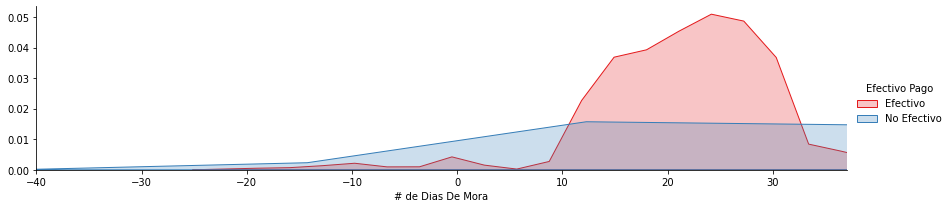

In [89]:
#Advance Vis
a = sns.FacetGrid(fulll, hue = 'Efectivo Pago', aspect=4, palette="Set1" )
a.map(sns.kdeplot, '# de Dias De Mora', shade= True )
a.set(xlim=(-40 , fulll['# de Dias De Mora'].quantile(0.90)))
a.add_legend()

In [93]:
vir.columns

Index(['Identificación', '# de suscripcion', 'Codigo de Gestion',
       '# de dias de mora', 'Calificación', 'Sistema Origen', 'Ciclo',
       'Fecha de Gestion', 'Fecha', 'Ano', 'mes', 'hora', 'dias', 'dias_Class',
       'cantidad', 'Reconta_class', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       'EMAIL ENTREGADO_sum', 'MENSAJE DE IVR ENTREGADO_sum',
       'MENSAJE DE TEXTO ENTREGADO_sum'],
      dtype='object')

# Busqueda de patrones

<AxesSubplot:title={'center':'Valor Total Cobrar_sum'}, xlabel='Efectivo Pago'>

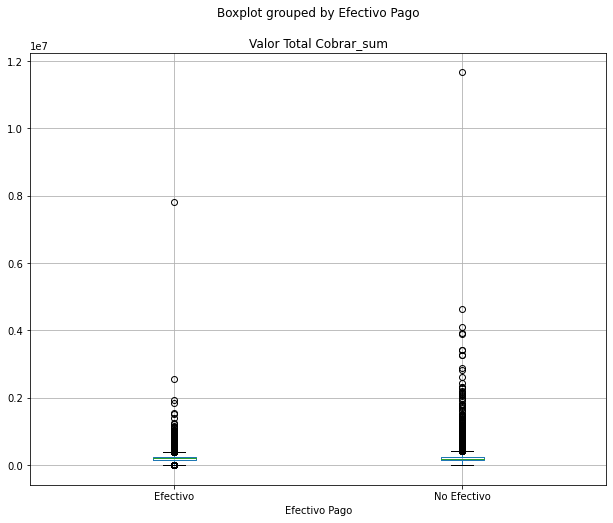

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
full.boxplot(column=['Valor Total Cobrar_sum'], by='Efectivo Pago', ax=ax)

<AxesSubplot:xlabel='Efectivo Pago', ylabel='Descripcion departamento'>

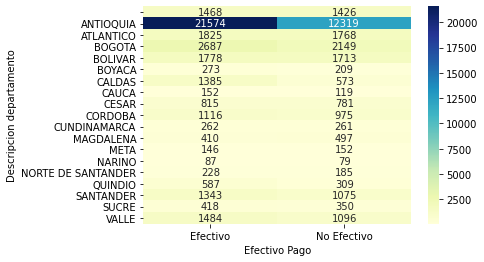

In [95]:
sns.heatmap(pd.crosstab(full['Descripcion departamento'],full['Efectivo Pago']), annot=True, fmt="d", cmap="YlGnBu")

<AxesSubplot:xlabel='ratio_vlr_vencido_cobro', ylabel='Efectivo Pago'>

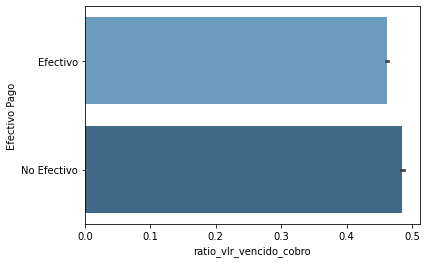

In [96]:
sns.barplot(x="ratio_vlr_vencido_cobro", y="Efectivo Pago", data=full,
                 palette="Blues_d")

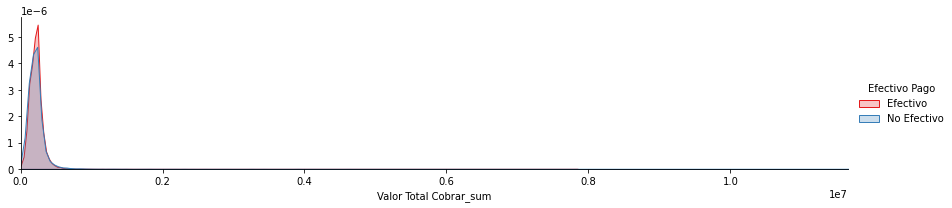

In [97]:
#Advance Vis
a = sns.FacetGrid(full, hue = 'Efectivo Pago', aspect=4, palette="Set1" )
a.map(sns.kdeplot, 'Valor Total Cobrar_sum', shade= True )
a.set(xlim=(0 , full['Valor Total Cobrar_sum'].max()))
a.add_legend()

<AxesSubplot:title={'center':'Valor Total Cobrar_sum'}, xlabel='Descripcion subcategoria'>

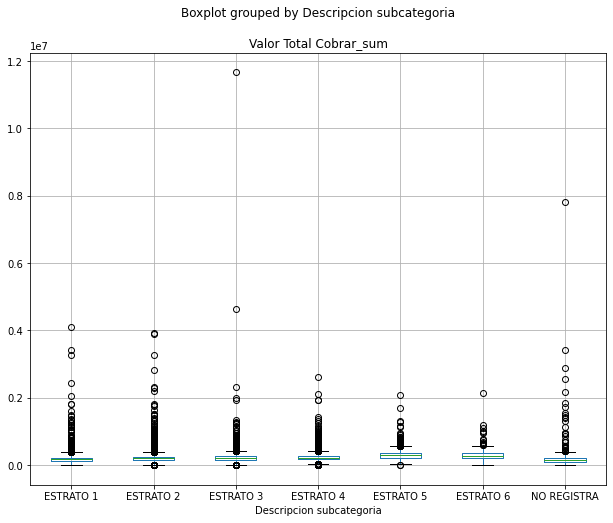

In [98]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
full.boxplot(column=['Valor Total Cobrar_sum'], by='Descripcion subcategoria', ax=ax)

<AxesSubplot:xlabel='Efectivo Pago', ylabel='AnÃ¡lisis Vector'>

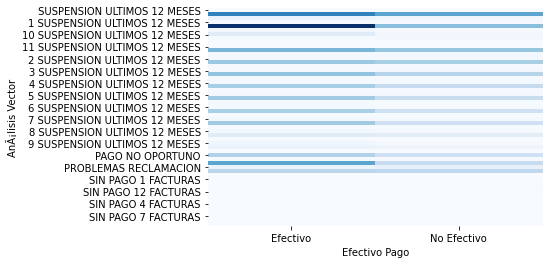

In [99]:
sns.heatmap(pd.crosstab(full['AnÃ¡lisis Vector'],full['Efectivo Pago']),cmap="Blues", cbar=False) 

In [100]:
pd.crosstab(full['Descripcion departamento'],full['Efectivo Pago']) ##3 realizar la división de efectivo y cruzarlos con la Bd original

Efectivo Pago,Efectivo,No Efectivo
Descripcion departamento,,
,1468,1426
ANTIOQUIA,21574,12319
ATLANTICO,1825,1768
BOGOTA,2687,2149
BOLIVAR,1778,1713
BOYACA,273,209
CALDAS,1385,573
CAUCA,152,119
CESAR,815,781


In [101]:
##3 que estrategia funciopna .. el numero de contacots de una persona para que pague

<AxesSubplot:xlabel='Descripcion subcategoria', ylabel='Descripcion departamento'>

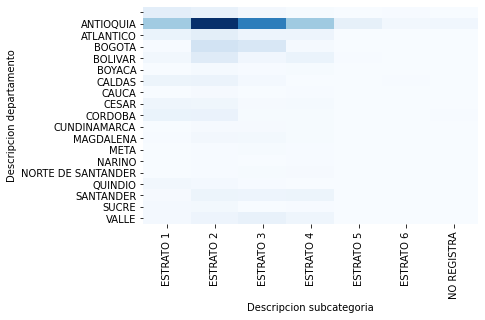

In [102]:
sns.heatmap(pd.crosstab(full['Descripcion departamento'],full['Descripcion subcategoria']),cmap="Blues", cbar=False) ### porcentaje de participación / efectivo

<AxesSubplot:xlabel='Efectivo Pago', ylabel='Analisis De Habito'>

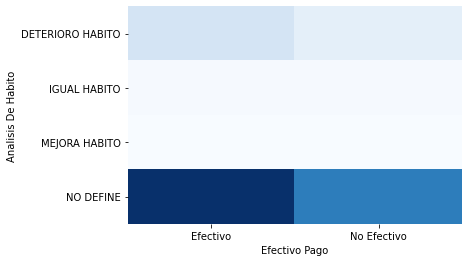

In [103]:
sns.heatmap(pd.crosstab(full['Analisis De Habito'],full['Efectivo Pago']),cmap="Blues", cbar=False)

<AxesSubplot:ylabel='Descripcion departamento'>

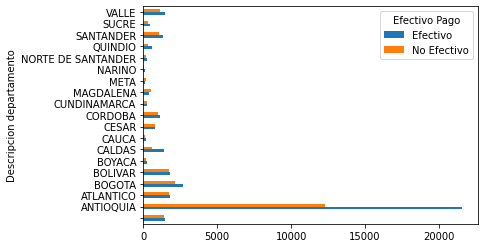

In [104]:
pd.crosstab(full['Descripcion departamento'],full['Efectivo Pago']).plot.barh()

<AxesSubplot:ylabel='Descripcion departamento'>

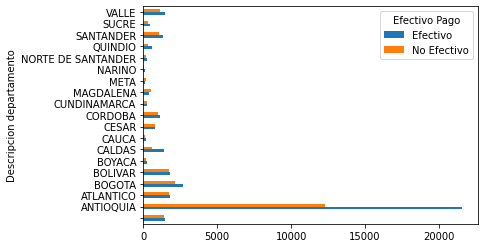

In [105]:
pd.crosstab(full['Descripcion departamento'],full['Efectivo Pago']).plot.barh()

In [106]:
##sepuede agrupar un pcoo más

<AxesSubplot:ylabel='AnÃ¡lisis Vector'>

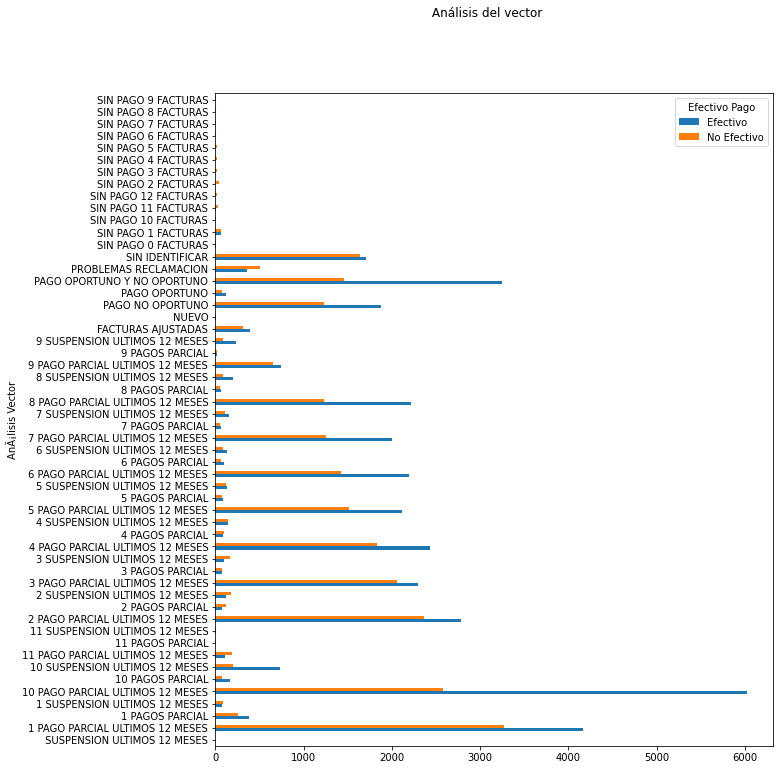

In [107]:
fig, ax = plt.subplots(figsize=(10,12))
plt.suptitle(' Análisis del vector')
pd.crosstab(full['AnÃ¡lisis Vector'],full['Efectivo Pago']).plot.barh(ax=ax)

<AxesSubplot:title={'center':'CalificaciÃ³n A Nivel De SuscripciÃ³n'}, xlabel='Descripcion estado de corte_retiro'>

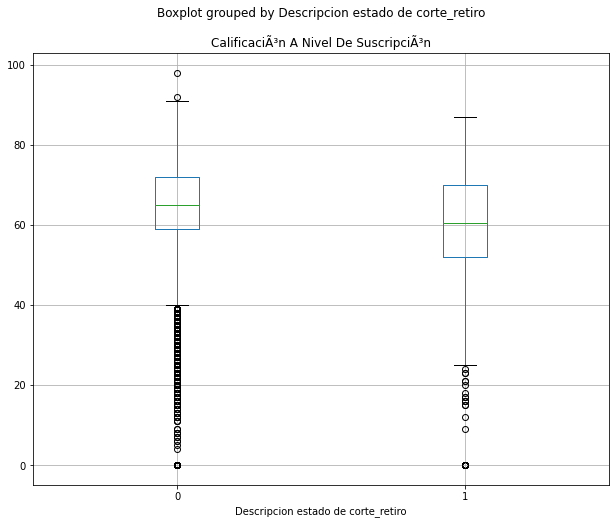

In [108]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
full.boxplot(column=['CalificaciÃ³n A Nivel De SuscripciÃ³n'], by='Descripcion estado de corte_retiro', ax=ax)

<AxesSubplot:title={'center':'ratio_vlr_vencido_cobro'}, xlabel='Efectivo Pago'>

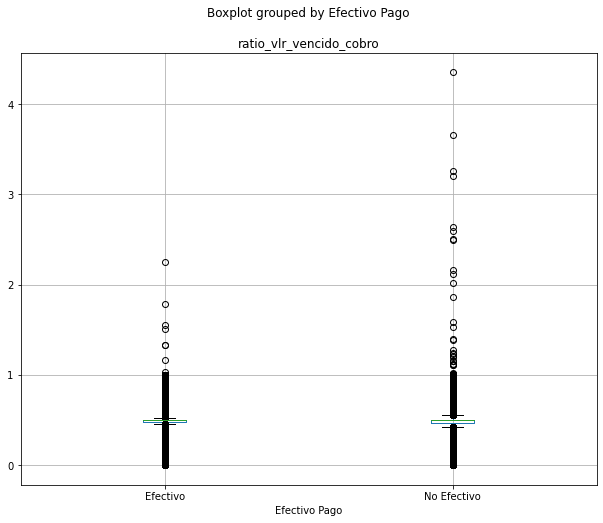

In [109]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
full.boxplot(column=['ratio_vlr_vencido_cobro'], by='Efectivo Pago', ax=ax)

In [110]:
df['Dias Suspension'][df['Dias Suspension']==' ']=0
df['Dias Suspension']=df['Dias Suspension'].astype('int')

C:\Users\scadacat\.conda\envs\procesos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


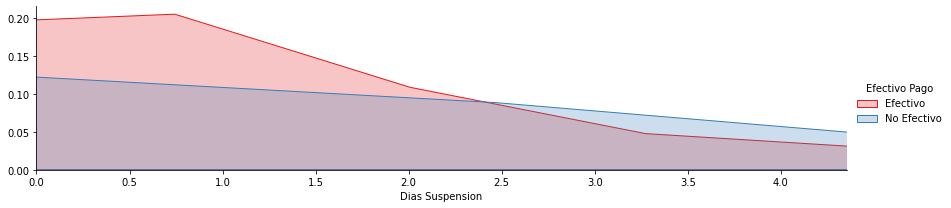

In [111]:
#Advance Vis
a = sns.FacetGrid(full, hue = 'Efectivo Pago', aspect=4, palette="Set1" )
a.map(sns.kdeplot, 'Dias Suspension', shade= True )
a.set(xlim=(0 , full['ratio_vlr_vencido_cobro'].max()))
a.add_legend()

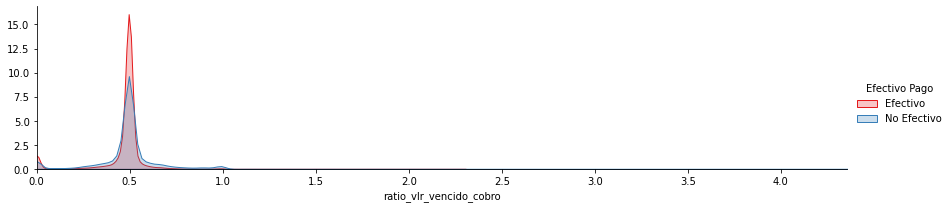

In [112]:
a = sns.FacetGrid(full, hue = 'Efectivo Pago', aspect=4, palette="Set1" )
a.map(sns.kdeplot, 'ratio_vlr_vencido_cobro', shade= True )
a.set(xlim=(0 , full['ratio_vlr_vencido_cobro'].max()))
a.add_legend()

<AxesSubplot:title={'center':'CalificaciÃ³n A Nivel De SuscripciÃ³n'}, xlabel='TipificaciÃ³n Cliente'>

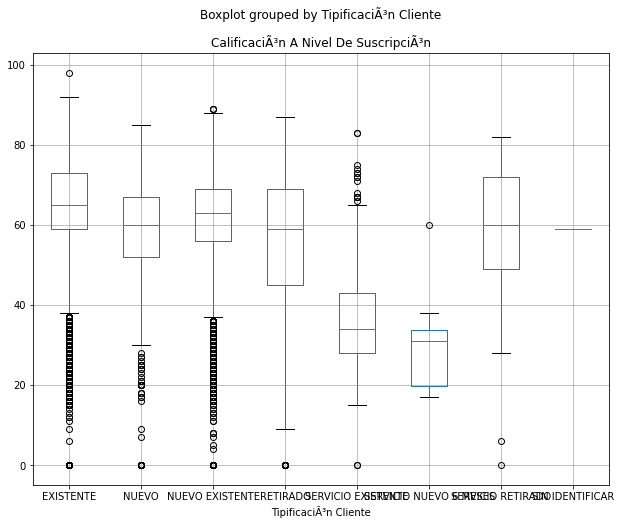

In [113]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
full.boxplot(column=['CalificaciÃ³n A Nivel De SuscripciÃ³n'], by='TipificaciÃ³n Cliente', ax=ax)

<AxesSubplot:title={'center':'CalificaciÃ³n A Nivel De SuscripciÃ³n'}, xlabel='Descripcion subcategoria'>

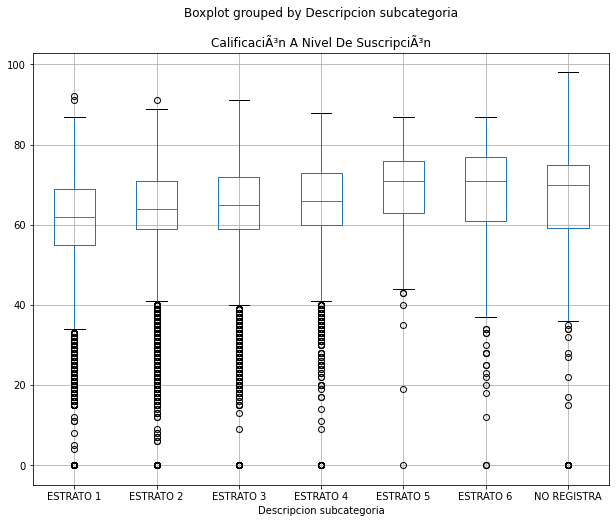

In [114]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
full.boxplot(column=['CalificaciÃ³n A Nivel De SuscripciÃ³n'], by='Descripcion subcategoria', ax=ax)

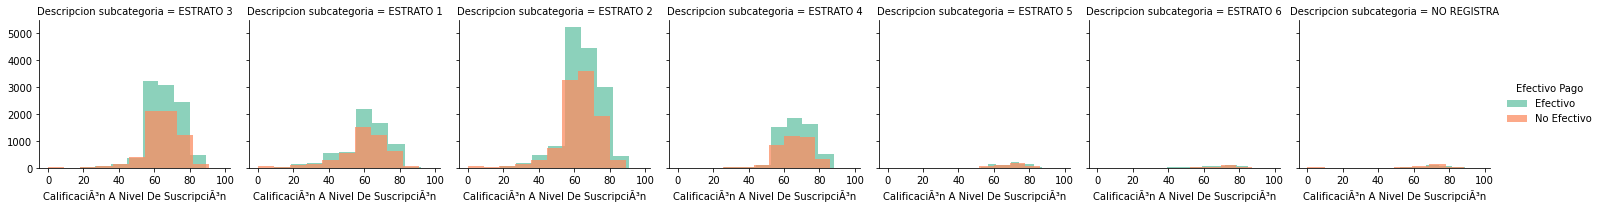

In [115]:
b = sns.FacetGrid(full, col = 'Descripcion subcategoria', hue = 'Efectivo Pago', palette="Set2")
b.map(plt.hist, 'CalificaciÃ³n A Nivel De SuscripciÃ³n', alpha = .75)
b.add_legend()

<AxesSubplot:>

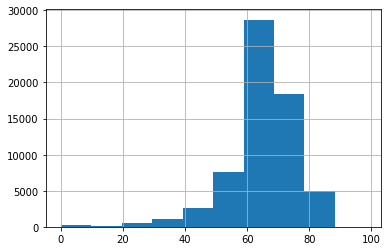

In [116]:
full['CalificaciÃ³n A Nivel De SuscripciÃ³n'].hist()

In [117]:
df.filter(like='echa').columns

Index(['Fecha de Asignacion', 'Fecha Ult Gestion', 'Fecha Actualizacion',
       'Fecha Vencimiento Sin Recargo', 'Fecha estado corte',
       'Fecha Debido Cobrar', 'Fecha de cuenta de cobro mas antigua',
       'fecha de importacion', 'Fecha de Instalacion', 'Fecha de Suspension',
       'Fecha Financiacion', 'Fecha Ingreso Fraude', 'Fecha Retiro',
       'Fecha Ult pago', 'Maxima fecha Ult Gestion',
       'Fecha de Asignacion_mes'],
      dtype='object')

In [118]:
# (dt.datetime.now()-df['Fecha Vencimiento Sin Recargo']).dt.days
# df['mora_calculada']=(dt.datetime.now()-df['Fecha Vencimiento Sin Recargo']).dt.days
# df['mora_calculada'].describe()
# df['mora_calculada'].hist()

In [111]:
print(full.columns.tolist())

['Identificacion', 'TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL', 'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA', 'valor vencido_sum', 'Valor Total Cobrar_sum', 'Valor financiado_sum', 'Valor Intereses de Mora_sum', '# de SuscripciÃ³n', 'Ciclo', 'Fecha de Asignacion', 'Fecha Ult Gestion', 'Usuario Grabador', '# servicio suscrito/abonado', 'Valor Total Cobrar', 'Valor Vencido', 'Descripcion localidad', 'Descripcion departamento', '# de Dias De Mora', 'Descripcion producto', 'Descripcion Regional', 'Dias sin Gestion', 'Direccion de instalacion', 'Fecha Actualizacion', 'Fecha Vencimiento Sin Recargo', 'Score Contactabilidad', 'sistema origen', 'Usuario', 'Descripcion Gestion Resultado', 'AnÃ¡lisis Vector', 'Vector Cualitativo # SuscripciÃ³n', 'TipificaciÃ³n Cliente', 'Perfil Digital', 'Descripcion subcategoria', 'CalificaciÃ³n A Nivel De SuscripciÃ³n', 'Tipificacion suscripcion', 'Antiguedad Cliente', 'Autopago', 'Tiene Compromiso', 'Codigo Departamento', 'Descripci

Index([], dtype='object')

In [112]:
full.head(2)

,Identificacion,TELEFONIA,INTERNET,TELEVISION,UNEMOVIL,LARGA DISTANCIA UNE,PAQUETE,OTRO PRODUCTO,LINEA BASICA,valor vencido_sum,Valor Total Cobrar_sum,Valor financiado_sum,Valor Intereses de Mora_sum,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Financiado,Indicador BI,Linea,Linea producto,Maxima fecha Ult Gestion,Maximo Cuentas con Saldo SuscripciÃ³n,Minimo Cuentas con Saldo SuscripciÃ³n,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Reportado a central de riesgos,Subsegmento,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Total valor pendiente suscripcion,Usuario Fraudulento,Dias Suspension,Movil equipos,Tipo De Documento,Ultimo Codigo de Gestion Agrupado,Codigo de Gestion Resultado Visita,Mejor Codigo Gestion Actual,Mejor Codigo Gestion Mes,Descripcion Mejor Codigo Gestion Mes,CalificaciÃ³n Servicio Suscrito,CalificaciÃ³n IdentificaciÃ³n,DÃ­a Pago 1,DÃ­a Pago 2,DÃ­a Pago 3,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Análisis Vector_PAGOS_PARCIAL,Análisis Vector_PAGO OPORTUNO,Análisis Vector_SIN_IDENTIFICAR,Análisis Vector_SIN_PAGO,Análisis Vector_suspension,Análisis Vector_indeterminado,Análisis Vector_pago_no_oport,Análisis Vector_otro_caso,Dias_ult_pago,dia_semana_ult_pago,mes_ult_pago,semana_ult_pago,trimestre_ult_pago,año_ult_pago,DIAS_desde_ult_pago,dias_ult_pago_cobro,dias_ult_pago_fac_ant,Fecha de Asignacion_mes,antiguedad_mes,dias_desde_ult_gestion,Descripcion producto_resumen,Hogar,Califica_suscr_class,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Descripcion estado de corte_Cl,Descripcion estado de corte_conexión,Descripcion estado de corte_suspención,Descripcion estado de corte_retiro,llave,cantidad_ser_dir,serv_dir,llave_2,Identificacion Del Cliente,Efectivo Pago,llave_exp,ratio_vlr_vencido_cobro
9321,1000000832,1,1,0,1,1,0,0,0,96988.0,215586.0,0.0,0.0,17322836,7,2020-10-18,2020-10-24,jmoyapen,131992360,152364.0,65394.0,SANTAFE DE BOGOTA,BOGOTA,20,INTERNET,BOGOTA,4,CL 33 SUR # 52 C - 76,2020-10-18 00:00:00,2020-11-09 00:00:00,0.95,OPEN_UNE,NIKHOL TATIANA MARTINEZ BUSTOS,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,5 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Digital (Canales propios),ESTRATO 3,66,EXISTENTE,NUEVO,NO APLICA,N,68,RESIDENCIAL,CONEXION,ACTIVO,Fidelizar,2019-01-24,,2020-10-13,2019-01-24 00:00:00,2018-12-10,,,,2020-12-31,2020-10-15,NO,NO REGISTRA,VAS,TELEVISION,,2,2,NO REGISTRA,Bajo,3,S,S,S,S,1,,Buena,POSITIVO,Bueno,PRINCIPAL,195552.00,No,0,,CC,PENDIENTE POR GESTIONAR,,14,9999,CARTERA PARA COBRO (AUTOMATICO),72,72,15,16,12,N,NO REGISTRA,NO DEFINE,Platino,1,0,0,0,0,0,0,0,15.0,3.0,10.0,42.0,4.0,2020.0,9.0,630.0,2.0,10,2,207,INTERNET,SEGMENTO YOUNG,"(60.0, 80.0]",1,1,CFA EN LINEA,OTRO BANCO,DISMINUCIÓN DE INGRESOS,CONEXION,1,0,0,1000000832_CL 33 SUR # 52 C - 76,4,2,1000000832_2020-10-18,1000000832,Efectivo,1000000832131992360,0.449881
58533,1000002457,1,1,1,0,0,0,0,0,203053.0,373985.0,0.0,0.0,15307092

In [115]:
datas[datas['Identificacion']=='1000000832'][datas.filter(like='alor').columns.insert(0,'Identificacion')]['Valor Factura'].\
astype(int).sum() ##3 la suma del valor de la factura coincide con el total del cobro

136950

In [108]:
## Área de validación de valores

In [109]:
datas[datas.filter(like='inan').columns].head()

,Fecha Financiacion,Financiado,Valor financiado
0,,NO,0
1,,NO,0
2,,NO,0
3,,NO,0
4,2020-01-30 00:00:00,SI,15848


In [ ]:
### pruebas de funcinamiento con base a 

In [123]:
# &(datas['Financiado']=='1000000832')
# (datas['Financiado']=='NO')&(

In [101]:
datas[datas['Identificacion']=='1072654344'][datas.filter(like='alor').columns.insert(0,'Identificacion')].head(10)

,Identificacion,Valor Total Cobrar,Valor Vencido,Alto valor,Total valor pendiente suscripcion,Valor Factura,Valor financiado,Valor Honorarios,Valor Intereses de Mora,Valor Iva Honorarios,Valor Pendiente
324599,1072654344,66765.00,37685.00,,113697.00,29080,0,0.00,0.00,0.00,66765.00
324600,1072654344,29009.00,0.00,,113697.00,29009.00,0,0.00,0.00,0.00,29009.00
324601,1072654344,17923.00,11651.00,,113697.00,6272,0,0.00,0.00,0.00,17923.00


In [103]:
full[full['Identificacion']=='1072654344'][full.filter(like='alor').columns.insert(0,'Identificacion')].head(10)

,Identificacion,valor vencido_sum,Valor Total Cobrar_sum,Valor Total Cobrar,Valor Vencido,Total valor pendiente suscripcion,Valor Factura,Valor financiado,Valor Honorarios,Valor Intereses de Mora
90131,1072654344,49336.0,113697.0,29009.0,0.0,113697.00,29009.0,0,0.00,0.0
90132,1072654344,49336.0,113697.0,29009.0,0.0,113697.00,29009.0,0,0.00,0.0


In [110]:
full[full.filter(like='alor').columns.insert(0,'Identificacion')].head(10)

,Identificacion,valor vencido_sum,Valor Total Cobrar_sum,Valor financiado_sum,Valor Intereses de Mora_sum,Valor Total Cobrar,Valor Vencido,Total valor pendiente suscripcion,Valor Factura,Valor financiado,Valor Honorarios,Valor Intereses de Mora
9321,1000000832,96988.0,215586.0,0000,0.0,152364.0,65394.0,195552.00,45252.0,0,0.00,0.0
58533,1000002457,203053.0,373985.0,000,0.0,58476.0,17684.0,373985.00,40792.0,0,0.00,0.0
77178,1000005038,20304.0,30535.0,0,0.0,30535.0,20304.0,30535.00,10231.0,0,0.00,0.0
58534,1000006765,73432.0,148879.0,000,0.0,14.0,0.0,148879.00,14.0,0,0.00,0.0
55084,1000018742,0.0,136290.0,000,0.0,64551.0,0.0,136290.00,64551.0,0,0.00,0.0
37224,10000366,126780.0,267542.0,000,0.0,118304.0,52685.0,267542.00,65619.0,0,0.00,0.0
20616,1000047106,245256.0,388895.0,0000,0.0,70979.0,50096.0,211758.00,34369.0,0,0.00,0.0
32315,1000066214,132247.0,271963.0,000,0.0,103627.0,51801.0,271963.00,51826.0,0,0.00,0.0
9322,1000066326,134251.0,268674.0,000,0.0,26089.0,13042.0,190179.00,48922.0,0,0.00,0.0
55086,1000066511,65533.0,196723.0,00,0.0,70446.0,2348.0,196723.00,68098.0,0,0.00,0.0


In [102]:
## pensar como tratarla

In [121]:
# (dt.datetime.now()-full['Fecha Retiro']).dt.days.describe()
# df['mora_calculada']=(dt.datetime.now()-full['Fecha Retiro']).dt.days

In [141]:
full["Efectivo Pago"].unique()

array([1, 0])

In [140]:
## Convierto mi salida en un output
full["Efectivo Pago"] = (full["Efectivo Pago"]=="Efectivo").astype(int)

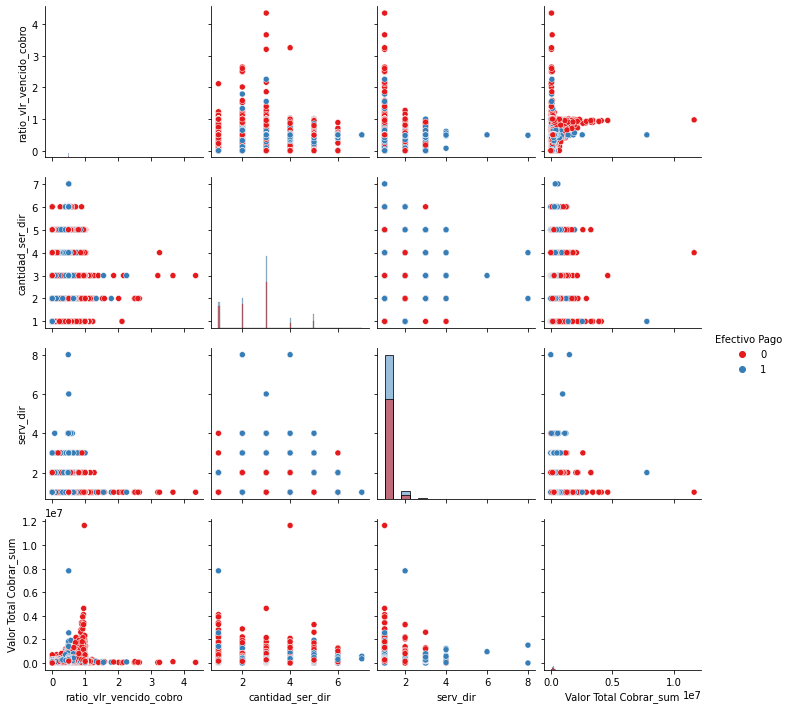

In [142]:
cols = ['Efectivo Pago', 'ratio_vlr_vencido_cobro','cantidad_ser_dir',
        'CalificaciÃ³n Servicio Suscrito','serv_dir','Valor Total Cobrar_sum','# de Dias De Mora']
sns.pairplot(full[cols], diag_kind="hist", hue = 'Efectivo Pago', palette="Set1")

In [143]:
full[cols].corr()

,Efectivo Pago,ratio_vlr_vencido_cobro,cantidad_ser_dir,serv_dir,Valor Total Cobrar_sum
Efectivo Pago,1.000000,-0.076828,0.076977,0.028478,0.011538
ratio_vlr_vencido_cobro,-0.076828,1.000000,-0.015441,0.003295,0.251118
cantidad_ser_dir,0.076977,-0.015441,1.000000,0.142818,0.336455
serv_dir,0.028478,0.003295,0.142818,1.000000,0.105521
Valor Total Cobrar_sum,0.011538,0.251118,0.336455,0.105521,1.000000


In [160]:
from pandas_profiling import ProfileReport

In [155]:
lis=full.columns[:50]

In [150]:
lis=lis.insert(0,'Efectivo Pago')

In [156]:
lis2=lis.insert(0,'Efectivo Pago')

In [157]:
full[lis2].head()

,Efectivo Pago,Identificacion,TELEFONIA,INTERNET,TELEVISION,UNEMOVIL,LARGA DISTANCIA UNE,PAQUETE,OTRO PRODUCTO,LINEA BASICA,valor vencido_sum,Valor Total Cobrar_sum,Valor financiado_sum,Valor Intereses de Mora_sum,# de SuscripciÃ³n,Ciclo,Fecha de Asignacion,Fecha Ult Gestion,Usuario Grabador,# servicio suscrito/abonado,Valor Total Cobrar,Valor Vencido,Descripcion localidad,Descripcion departamento,# de Dias De Mora,Descripcion producto,Descripcion Regional,Dias sin Gestion,Direccion de instalacion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Score Contactabilidad,sistema origen,Usuario,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,CalificaciÃ³n A Nivel De SuscripciÃ³n,Tipificacion suscripcion,Antiguedad Cliente,Autopago,Tiene Compromiso,Codigo Departamento,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Fecha estado corte
9321,1,1000000832,1,1,0,1,1,0,0,0,96988.0,215586.0,0.0,0.0,17322836,7,2020-10-18,2020-10-24,jmoyapen,131992360,152364.0,65394.0,SANTAFE DE BOGOTA,BOGOTA,20,INTERNET,BOGOTA,4,CL 33 SUR # 52 C - 76,2020-10-18 00:00:00,2020-11-09 00:00:00,0.95,OPEN_UNE,NIKHOL TATIANA MARTINEZ BUSTOS,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,5 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Digital (Canales propios),ESTRATO 3,66,EXISTENTE,NUEVO,NO APLICA,N,68,RESIDENCIAL,CONEXION,ACTIVO,Fidelizar,2019-01-24
58533,1,1000002457,1,1,1,0,0,0,0,0,203053.0,373985.0,0.0,0.0,15307092,31,2020-12-23,2020-12-23,admon,129201927,58476.0,17684.0,SANTAFE DE BOGOTA,BOGOTA,28,TELEFONIA,BOGOTA,21,CL 70 D # 105 F - 57,2020-12-23 00:00:00,2021-01-15 00:00:00,0.26667,OPEN_UNE,KAREN DAYANA ENAO GARCIA,PENDIENTE POR GESTIONAR,10 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Banca Tradicional,ESTRATO 3,61,EXISTENTE,ANTIGUO,NO APLICA,N,11,RESIDENCIAL,CONEXION,ACTIVO,Potenciar,2020-12-23
77178,0,1000005038,1,0,0,0,0,0,0,0,20304.0,30535.0,0.0,0.0,17688891,7,2021-04-03,2021-04-09,nfajardo,133718630,30535.0,20304.0,FACATATIVA,CUNDINAMARCA,51,TELEFONIA,ORIENTE,19,KR 2 SUR # 7 B - 12 PI 1,2021-04-21 00:00:00,2021-05-07 00:00:00,,OPEN_UNE,JOHNNY ALBERTO ESPA OL MONROY,NO HUBO ACUERDO,1 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,NUEVO EXISTENTE,Banca Tradicional,ESTRATO 1,57,NUEVO EXISTENTE,NO REGISTRA,NO APLICA,N,25,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,2021-03-18
58534,0,1000006765,1,1,1,0,0,0,0,0,73432.0,148879.0,0.0,0.0,15600966,31,2020-12-23,2020-12-23,admon,129779475,14.0,0.0,PASTO,NARINO,28,TELEFONIA,OCCIDENTE,21,KR 23 # 11 - 95 AP 302,2020-12-23 00:00:00,2020-12-16 00:00:00,0.58333,OPEN_UNE,JUAN CAMILO MARTINEZ MEJIA,PENDIENTE POR GESTIONAR,6 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Digital (Canales propios),ESTRATO 3,66,EXISTENTE,NUEVO,NO APLICA,N,52,RESIDENCIAL,CONEXION,ACTIVO,Potenciar,2020-10-09
55084,1,1000018742,1,1,1,0,0,0,0,0,0.0,136290.0,0.0,0.0,17064045,7,2020-12-18,2021-01-13,admon,132543802,64551.0,0.0,SANTAFE DE BOGOTA,BOGOTA,37,TELEVISION,BOGOTA,0,CL 37 BIS SUR # 68 H - 26,2020-12-18 00:00:00,2021-01-06 00:00:00,,OPEN_UNE,LAURA MILENA BELTRAN GIRALDO,CIERRE DE COMPROMISO POR ACUERDO CUMPLIDO,4 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,NUEVO EXISTENTE,Banca Tradicional,ESTRATO 3,55,NUEVO EXISTENTE,NO REGISTRA,NO APLICA,N,11,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,2020-12-15


In [158]:
dat=full[lis2]
dat=dat[:5000]

In [161]:
profile = ProfileReport(dat,title='Pandas Profiling Reporting', explorative=True)

In [162]:
profile.to_file(output_file='output_s.html')

Summarize dataset:  89%|██████████████████████████████████████▎    | 58/65 [40:05<04:50, 41.47s/it, Get scatter matrix]


KeyboardInterrupt: 

In [133]:
full[full.filter(like='echa').columns].sample(50)

,Fecha de Asignacion,Fecha Ult Gestion,Fecha Actualizacion,Fecha Vencimiento Sin Recargo,Fecha estado corte,Fecha Debido Cobrar,Fecha de cuenta de cobro mas antigua,fecha de importacion,Fecha de Instalacion,Fecha de Suspension,Fecha Financiacion,Fecha Ingreso Fraude,Fecha Retiro,Fecha Ult pago,Maxima fecha Ult Gestion,Fecha de Asignacion_mes
80956,2021-04-21,2021-04-28,2021-04-21 00:00:00,2021-05-07 00:00:00,2020-11-24,,2021-04-08,2020-08-20 00:00:00,2020-03-27,,,,4732-12-31 00:00:00,2021-04-06,,4
7592,2020-10-15,2020-10-28,2020-10-15 00:00:00,2020-11-06 00:00:00,2019-04-18,,2020-10-05,2016-03-12 00:00:00,2015-12-04,,,,4732-12-31 00:00:00,2020-10-05,,10
84282,2021-04-22,2021-04-22,2021-04-22 00:00:00,2021-05-12 00:00:00,2019-04-18,,2021-04-12,2019-04-18 00:00:00,2019-02-25,,,,4732-12-31 00:00:00,2021-04-12,,4
20498,2020-10-21,2020-10-21,2020-10-21 00:00:00,2020-11-12 00:00:00,2020-10-22,,2020-10-16,2018-10-19 00:00:00,2018-09-13,,,,4732-12-31 00:00:00,2020-10-20,,10
37960,2020-11-22,2020-11-22,2020-11-22 00:00:00,2020-12-14 00:00:00,2020-11-21,,2020-11-12,2019-05-22 00:00:00,2019-03-16,,,,4732-12-31 00:00:00,2020-11-19,,11
20187,2020-10-21,2020-10-21,2020-10-21 00:00:00,2020-11-12 00:00:00,2018-10-16,,2019-04-01,2018-10-16 00:00:00,2014-09-02,,,,4732-12-31 00:00:00,2019-03-04,,10
44087,2020-11-25,2020-11-25,2020-11-25 00:00:00,2020-12-16 00:00:00,2019-08-28,,2020-11-17,2018-11-25 00:00:00,2018-10-30,,,,4732-12-31 00:00:00,2020-11-16,,11
51233,2020-11-28,2020-11-28,2020-11-29 00:00:00,2020-12-17 00:00:00,NaT,,2020-11-17,2011-11-04 00:00:00,2003-03-22,,,,4732-12-31 00:00:00,2020-10-21,2013-07-25 00:00:00,11
7813,2020-10-15,2020-10-22,2020-10-04 00:00:00,2020-02-03 00:00:00,2020-04-20,,2020-10-08,2020-04-20 00:00:00,2020-02-12,,,,4732-12-31 00:00:00,2020-10-13,,10
48385,2020-11-28,2020-11-28,2020-11-28 00:00:00,2020-12-18 00:00:00,2020-06-27,,2020-11-19,2016-05-27 00:00:00,2016-04-29,,,,4732-12-31 00:00:00,2020-11-12,,11


In [148]:
df['Fecha Debido Cobrar_2']=pd.to_datetime(df['Fecha Debido Cobrar'],format='%Y-%m-%d',errors = "coerce")

In [ ]:
df['Fecha Debido Cobrar_2']

In [ ]:
df['Fecha Debido Cobrar']=pd.to_datetime(df['Fecha Debido Cobrar'],format='%Y-%m-%d%')

In [ ]:
(df['Fecha Debido Cobrar']-df['Fecha Vencimiento Sin Recargo']).dt.days

In [ ]:
df['Fecha Vencimiento Sin Recargo']=pd.to_datetime(df['Fecha Vencimiento Sin Recargo'],format='%Y-%m-%d') 


In [90]:
full.drop(['Total servicio','Subsegmento','Mejor Codigo Gestion Actual','CalificaciÃ³n Servicio Suscrito',
           '# servicio suscrito/abonado','Direccion de instalacion','Primera Mora','llave_2',
           'Mejor Codigo Gestion Mes','llave','Identificacion Del Cliente','Identificacion','Centrales de riesgos'],axis=1,inplace=True)

In [122]:
print(full.columns.tolist())

['Identificacion', 'Total servicio', 'TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL', 'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA', 'valor vencido_sum', 'Valor Total Cobrar_sum', '# de SuscripciÃ³n', 'Ciclo', 'Fecha de Asignacion', 'Fecha Ult Gestion', 'Usuario Grabador', '# servicio suscrito/abonado', 'Valor Total Cobrar', 'Valor Vencido', 'Descripcion localidad', 'Descripcion departamento', '# de Dias De Mora', 'Descripcion producto', 'Descripcion Regional', 'Dias sin Gestion', 'Direccion de instalacion', 'Fecha Actualizacion', 'Fecha Vencimiento Sin Recargo', 'Score Contactabilidad', 'sistema origen', 'Usuario', 'Descripcion Gestion Resultado', 'AnÃ¡lisis Vector', 'Vector Cualitativo # SuscripciÃ³n', 'TipificaciÃ³n Cliente', 'Perfil Digital', 'Descripcion subcategoria', 'CalificaciÃ³n A Nivel De SuscripciÃ³n', 'Tipificacion suscripcion', 'Antiguedad Cliente', 'Autopago', 'Tiene Compromiso', 'Codigo Departamento', 'Descripcion categoria', 'Descripcion estado de

## Procesado de perfiles

In [151]:
estrato_exito=full.groupby(['Hogar','Efectivo Pago']).agg({'llave_2':'nunique'})
estrato_exito_1 = estrato_exito.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
estrato_exito_1

llave_2
Hogar           Efectivo Pago           
SEGMENTO LEGEND Efectivo       62.411348
                No Efectivo    37.588652
SEGMENTO MASTER Efectivo       62.282970
                No Efectivo    37.717030
SEGMENTO YOUNG  Efectivo       59.176832
                No Efectivo    40.823168

In [148]:
estrato_exito=full.groupby(['Descripcion subcategoria','Efectivo Pago']).agg({'llave_2':'nunique'})
estrato_exito_1 = estrato_exito.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [152]:
estrato_exito_1.reset_index()

,Hogar,Efectivo Pago,llave_2
0,SEGMENTO LEGEND,Efectivo,62.411348
1,SEGMENTO LEGEND,No Efectivo,37.588652
2,SEGMENTO MASTER,Efectivo,62.282970
3,SEGMENTO MASTER,No Efectivo,37.717030
4,SEGMENTO YOUNG,Efectivo,59.176832
5,SEGMENTO YOUNG,No Efectivo,40.823168


In [ ]:
estrato_exito.sort_values('llave_2', ascending= False) ## quedarme sólo con los efectivos

## como pueden gestionar eso que ya ha pasado...
## si vas a trabajar con el estrato uno ... el primer foco va a ser el segmento Young...
## toca

In [147]:
estrato_exito.sort_values('llave_2', ascending= False) ## quedarme sólo con los efectivos

llave_2
Descripcion subcategoria Efectivo Pago         
ESTRATO 2                Efectivo         14647
                         No Efectivo      10393
ESTRATO 3                Efectivo          9811
                         No Efectivo       6277
ESTRATO 1                Efectivo          6268
ESTRATO 4                Efectivo          5735
ESTRATO 1                No Efectivo       4647
ESTRATO 4                No Efectivo       3674
ESTRATO 5                Efectivo           898
                         No Efectivo        463
ESTRATO 6                Efectivo           402
NO REGISTRA              No Efectivo        354
                         Efectivo           286
ESTRATO 6                No Efectivo        235

In [140]:
estrato_exito=full.groupby(['Descripcion subcategoria','v 0c','Efectivo Pago']).agg({'llave_2':'nunique'})

In [141]:
estrato_exito_1 = estrato_exito.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [143]:
full['Descripcion subcategoria'].value_counts()

ESTRATO 2      25040
ESTRATO 3      16088
ESTRATO 1      10915
ESTRATO 4       9409
ESTRATO 5       1361
NO REGISTRA      640
ESTRATO 6        637
Name: Descripcion subcategoria, dtype: int64

In [142]:
estrato_exito_1

llave_2
Descripcion subcategoria Hogar           Efectivo Pago           
ESTRATO 1                SEGMENTO LEGEND Efectivo        0.723775
                                         No Efectivo     0.540541
                         SEGMENTO MASTER Efectivo        2.033898
                                         No Efectivo     1.493358
                         SEGMENTO YOUNG  Efectivo       54.667888
                                         No Efectivo    40.540541
ESTRATO 2                SEGMENTO LEGEND Efectivo        1.038339
                                         No Efectivo     0.615016
                         SEGMENTO MASTER Efectivo        2.376198
                                         No Efectivo     1.497604
                         SEGMENTO YOUNG  Efectivo       55.079872
                                         No Efectivo    39.392971
ESTRATO 3                SEGMENTO LEGEND Efectivo        1.404774
                                         No Efectivo     0.621581
                         SEGMENTO MASTER Efectivo        2.983590
                                         No Efectivo     1.553953
                         SEGMENTO YOUNG  Efectivo       56.594978
                                         No Efectivo    36.841124
ESTRATO 4                SEGMENTO LEGEND Efectivo        0.722712
                                         No Efectivo     0.520778
                         SEGMENTO MASTER Efectivo        2.200021
                                         No Efectivo     1.190350
                         SEGMENTO YOUNG  Efectivo       58.029546
                                         No Efectivo    37.336593
ESTRATO 5                SEGMENTO LEGEND Efectivo        2.204262
                                         No Efectivo     1.175606
                         SEGMENTO MASTER Efectivo        6.539309
                                         No Efectivo     3.159442
                         SEGMENTO YOUNG  Efectivo       57.237325
                                         No Efectivo    29.684056
ESTRATO 6                SEGMENTO LEGEND Efectivo        2.040816
                                         No Efectivo     1.569859
                         SEGMENTO MASTER Efectivo        9.419152
                                         No Efectivo     4.238619
                         SEGMENTO YOUNG  Efectivo       51.648352
                                         No Efectivo    31.083203
NO REGISTRA              SEGMENTO LEGEND Efectivo        4.375000
                                         No Efectivo     5.625000
                         SEGMENTO MASTER Efectivo        5.156250
                                         No Efectivo     7.968750
                         SEGMENTO YOUNG  Efectivo       35.156250
                                         No Efectivo    41.718750

In [ ]:
full.drop(['llave','llave_2','Usuario','Identificacion Del Cliente','# de SuscripciÃ³n',
                 'Direccion de instalacion','# servicio suscrito/abonado'],inplace=True,axis=1)

#### Realizo una copia de la BD y realizo el group by

In [88]:
full2=full.drop(['llave','llave_2','Usuario','Identificacion Del Cliente','# de SuscripciÃ³n',
                 'Direccion de instalacion','# servicio suscrito/abonado'],axis=1)

## Creación de perfiles --- Con group by

In [103]:
full2.drop(full2.filter(like='echa').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='valor').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='nálisis Vector').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='trime').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='mes').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='semana').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='año').columns,axis=1,inplace=True)
full2.drop(full2.filter(like='alor').columns,axis=1,inplace=True)

In [104]:
# full2.drop(['# de Dias De Mora',
#                     'CalificaciÃ³n A Nivel De SuscripciÃ³n',
#                    'Tipificacion suscripcion', 'Descripcion estado de corte_Cl',
#                    'Descripcion estado de corte_conexión', 'Descripcion estado de corte_suspención',
#                    'Descripcion estado de corte_retiro','Ultimo Codigo de Gestion Agrupado',
#                    'Maximo Cuentas con Saldo SuscripciÃ³n','Minimo Cuentas con Saldo SuscripciÃ³n',
#                   'DescripciÃ³n Departamento TelÃ©fono Mejor Contactabilidad','Dias sin Gestion',
#                   'llave_exp','Score Contactabilidad','Primera Mora','Movil equipos','Nombre del Grabador',
#             'DÃ­a Pago 1','DÃ­a Pago 2','DÃ­a Pago 3','Subsegmento','Centrales de riesgos','Codigo de Gestion Resultado Visita',
#            'Reportado a central de riesgos','Dias Suspension','Usuario','Descripcion Mejor Codigo Gestion Mes',
#             'Descripcion de la Tarea','Codigo Departamento','Indicador BI','CalificaciÃ³n IdentificaciÃ³n',
#            'Mejor Codigo Gestion Actual','Mejor Codigo Gestion Mes','Banco 1','Banco 2','Causal'
#            ,'CalificaciÃ³n Servicio Suscrito'],axis=1,inplace=True)

In [105]:
full2.drop(['CalificaciÃ³n A Nivel De SuscripciÃ³n',
                   'Tipificacion suscripcion', 'Descripcion estado de corte_Cl',
                   'Descripcion estado de corte_conexión', 'Descripcion estado de corte_suspención',
                   'Descripcion estado de corte_retiro','Ultimo Codigo de Gestion Agrupado',
                   'Maximo Cuentas con Saldo SuscripciÃ³n','Minimo Cuentas con Saldo SuscripciÃ³n',
                  'DescripciÃ³n Departamento TelÃ©fono Mejor Contactabilidad',
                  'llave_exp','Score Contactabilidad','Primera Mora','Movil equipos',
            'DÃ­a Pago 1','DÃ­a Pago 2','DÃ­a Pago 3','Subsegmento','Centrales de riesgos','Codigo de Gestion Resultado Visita',
           'Reportado a central de riesgos','Usuario','Descripcion Mejor Codigo Gestion Mes',
            'Codigo Departamento','Indicador BI','CalificaciÃ³n IdentificaciÃ³n',
           'Mejor Codigo Gestion Actual','Mejor Codigo Gestion Mes'
           ,'CalificaciÃ³n Servicio Suscrito','Usuario Grabador','DIAS_desde_ult_pago','Total servicio'],axis=1,inplace=True)

In [106]:
full2.drop(full2.filter(like='ias').columns,axis=1,inplace=True)

In [107]:
types = pd.DataFrame(full2.dtypes)
print("Tipos de variables", types.groupby(0).size())

consolidado = full2.replace({False: 0, True: 1})

types = pd.DataFrame(consolidado.dtypes)
print("Tipos de variables luego de reemplazo",types.groupby(0).size())

Tipos de variables 0
uint8      8
int64      2
object    48
dtype: int64
Tipos de variables luego de reemplazo 0
uint8      8
int64      2
object    48
dtype: int64


In [108]:
categoricas = types.index[types[0] == 'O'].values

In [109]:
categoricas=categoricas.tolist()

In [110]:
print(full2.columns.tolist())

['Identificacion', 'TELEFONIA', 'INTERNET', 'TELEVISION', 'UNEMOVIL', 'LARGA DISTANCIA UNE', 'PAQUETE', 'OTRO PRODUCTO', 'LINEA BASICA', 'Ciclo', 'Descripcion localidad', 'Descripcion departamento', 'Descripcion producto', 'Descripcion Regional', 'sistema origen', 'Descripcion Gestion Resultado', 'AnÃ¡lisis Vector', 'Vector Cualitativo # SuscripciÃ³n', 'TipificaciÃ³n Cliente', 'Perfil Digital', 'Descripcion subcategoria', 'Antiguedad Cliente', 'Autopago', 'Tiene Compromiso', 'Descripcion categoria', 'Descripcion estado de corte', 'Estado del Cliente', 'Estrategia', 'Financiado', 'Linea', 'Linea producto', 'Nivel de riesgo experian', 'Nivel de Riesgo', 'Nivel Estrategia Cobro', 'Obligaciones con celular', 'Obligaciones con email', 'Obligaciones Con Telefono', 'Real reportado en central de riesgos', 'Tipo Contactabilidad', 'Tipo de Reporte a Central de Riesgos', 'Tipo Habito de Pago', 'Tipo Producto Servicio Suscrito', 'Usuario Fraudulento', 'Tipo De Documento', 'Inscrito Factura Web', '

In [114]:
full2[categoricas].head(2)

,Identificacion,Ciclo,Descripcion localidad,Descripcion departamento,Descripcion producto,Descripcion Regional,sistema origen,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,Antiguedad Cliente,Autopago,Tiene Compromiso,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Financiado,Linea,Linea producto,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Usuario Fraudulento,Tipo De Documento,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Descripcion producto_resumen,Hogar,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Efectivo Pago
9324,1000000832,7,SANTAFE DE BOGOTA,BOGOTA,LARGA DISTANCIA UNE,BOGOTA,OPEN_UNE,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,1 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,NUEVO,Digital (Canales propios),ESTRATO 3,NUEVO,NO APLICA,N,RESIDENCIAL,CONEXION,ACTIVO,Fidelizar,NO,VAS,INTERNET,NO REGISTRA,Bajo,3,S,S,S,S,Buena,POSITIVO,Bueno,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Platino,LARGA DISTANCIA UNE,SEGMENTO YOUNG,1,1,CFA EN LINEA,OTRO BANCO,DISMINUCIÓN DE INGRESOS,Efectivo
58545,1000002457,31,SANTAFE DE BOGOTA,BOGOTA,TELEFONIA,BOGOTA,OPEN_UNE,PENDIENTE POR GESTIONAR,10 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Banca Tradicional,ESTRATO 3,ANTIGUO,NO APLICA,N,RESIDENCIAL,CONEXION,ACTIVO,Potenciar,NO,VOZ,VOZ,NO REGISTRA,Moderado,4,S,S,S,S,Buena,POSITIVO,Bueno,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Oro,TELEFONIA,SEGMENTO YOUNG,1,1,COLPATRIA EN LINEA,CFA EN LINEA,DISMINUCIÓN DE INGRESOS,Efectivo


In [115]:
categoricas.remove('Identificacion')

In [116]:
group=full2.groupby(categoricas).agg({'Identificacion':'count'}).reset_index()

### Insumo principal para hallar los perfiles de pago

In [117]:
group.head()

,Ciclo,Descripcion localidad,Descripcion departamento,Descripcion producto,Descripcion Regional,sistema origen,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,Antiguedad Cliente,Autopago,Tiene Compromiso,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Financiado,Linea,Linea producto,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Usuario Fraudulento,Tipo De Documento,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Descripcion producto_resumen,Hogar,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Efectivo Pago,Identificacion
0,1,ABRIAQUI,ANTIOQUIA,INTERNET,NOROCCIDENTE,OPEN_EDATEL,NO CONOCEN AL DEUDOR (NO VIVE / NO TRABAJA),2 SUSPENSION ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 2,NO REGISTRA,NO APLICA,N,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,VAS,TELEVISION,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,N,N,S,NO REGISTRA,POSITIVO,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,1,PSE - BOTON DE PAGOS TD,BANCOLOMBIA PSE,NO REGISTRA,No Efectivo,1
1,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 PAGO PARCIAL ULTIMOS 12 MESES,MALO,NUEVO EXISTENTE,Sin perfil,ESTRATO 1,NO REGISTRA,NO APLICA,N,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,Internet,VAS,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,N,S,0,NO REGISTRA,,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,UNE - BANCOLOMBIA,DISMINUCIÓN DE INGRESOS,Efectivo,1
2,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 1,ANTIGUO,NO APLICA,N,RESIDENCIAL,CONEXION,ACTIVO,Mantener,NO,Internet,VAS,NO REGISTRA,Bajo,4,S,S,N,0,Buena,,Bueno,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Plata,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,OTRO BANCO,DISMINUCIÓN DE INGRESOS,No Efectivo,1
3,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 SUSPENSION ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 2,NO REGISTRA,NO APLICA,N,RESIDENCIAL,SUSPENSION TOTAL,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,Internet,VAS,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,N,0,NO REGISTRA,,,PRINCIPAL,No,CC,N,RB,DETERIORO HABITO,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,UNE - BANCOLOMBIA,DISMINUCIÓN DE INGRESOS,No Efectivo,1
4,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 SUSPENSION ULTIMOS 12 MESES,REGULAR,NUEVO EXISTENTE,Sin perfil,ESTRATO 1,NO REGISTRA,NO APLICA,N,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,Internet,VAS,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,S,0,NO REGISTRA,,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,OTRO BANCO,DISMINUCIÓN DE INGRESOS,No Efectivo,1


In [120]:
group.to_csv('C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/categoricas_agrupadas.csv',sep=';',encoding='utf-8')

In [154]:
grupo_=pd.read_csv(r'C:/Users/scadacat/Desktop/TIGO (Cliente)/Cobranzas/categoricas_agrupadas.csv',sep=';',encoding='utf-8')

In [156]:
grupo_.head(5)

,Unnamed: 0,Ciclo,Descripcion localidad,Descripcion departamento,Descripcion producto,Descripcion Regional,sistema origen,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,Antiguedad Cliente,Autopago,Tiene Compromiso,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Financiado,Linea,Linea producto,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Usuario Fraudulento,Tipo De Documento,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Descripcion producto_resumen,Hogar,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Efectivo Pago,Identificacion
0,0,1,ABRIAQUI,ANTIOQUIA,INTERNET,NOROCCIDENTE,OPEN_EDATEL,NO CONOCEN AL DEUDOR (NO VIVE / NO TRABAJA),2 SUSPENSION ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 2,NO REGISTRA,NO APLICA,N,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,VAS,TELEVISION,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,N,N,S,NO REGISTRA,POSITIVO,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,1,PSE - BOTON DE PAGOS TD,BANCOLOMBIA PSE,NO REGISTRA,No Efectivo,1
1,1,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 PAGO PARCIAL ULTIMOS 12 MESES,MALO,NUEVO EXISTENTE,Sin perfil,ESTRATO 1,NO REGISTRA,NO APLICA,N,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,Internet,VAS,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,N,S,0,NO REGISTRA,,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,UNE - BANCOLOMBIA,DISMINUCIÓN DE INGRESOS,Efectivo,1
2,2,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 1,ANTIGUO,NO APLICA,N,RESIDENCIAL,CONEXION,ACTIVO,Mantener,NO,Internet,VAS,NO REGISTRA,Bajo,4,S,S,N,0,Buena,,Bueno,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Plata,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,OTRO BANCO,DISMINUCIÓN DE INGRESOS,No Efectivo,1
3,3,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 SUSPENSION ULTIMOS 12 MESES,REGULAR,EXISTENTE,Sin perfil,ESTRATO 2,NO REGISTRA,NO APLICA,N,RESIDENCIAL,SUSPENSION TOTAL,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,Internet,VAS,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,N,0,NO REGISTRA,,,PRINCIPAL,No,CC,N,RB,DETERIORO HABITO,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,UNE - BANCOLOMBIA,DISMINUCIÓN DE INGRESOS,No Efectivo,1
4,4,1,AGUACHICA,CESAR,INTERNET,ORIENTE,OPEN_EDATEL,CIERRE DE COMPROMISO POR INCUMPLIMIENTO,1 SUSPENSION ULTIMOS 12 MESES,REGULAR,NUEVO EXISTENTE,Sin perfil,ESTRATO 1,NO REGISTRA,NO APLICA,N,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,Internet,VAS,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,S,0,NO REGISTRA,,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,OTRO BANCO,OTRO BANCO,DISMINUCIÓN DE INGRESOS,No Efectivo,1


In [160]:
grupo_.Identificacion.value_counts()

1    63936
2       54
3        8
4        1
Name: Identificacion, dtype: int64

In [158]:
grupo_.sort_values('Identificacion',ascending=False).head()

,Unnamed: 0,Ciclo,Descripcion localidad,Descripcion departamento,Descripcion producto,Descripcion Regional,sistema origen,Descripcion Gestion Resultado,AnÃ¡lisis Vector,Vector Cualitativo # SuscripciÃ³n,TipificaciÃ³n Cliente,Perfil Digital,Descripcion subcategoria,Antiguedad Cliente,Autopago,Tiene Compromiso,Descripcion categoria,Descripcion estado de corte,Estado del Cliente,Estrategia,Financiado,Linea,Linea producto,Nivel de riesgo experian,Nivel de Riesgo,Nivel Estrategia Cobro,Obligaciones con celular,Obligaciones con email,Obligaciones Con Telefono,Real reportado en central de riesgos,Tipo Contactabilidad,Tipo de Reporte a Central de Riesgos,Tipo Habito de Pago,Tipo Producto Servicio Suscrito,Usuario Fraudulento,Tipo De Documento,Inscrito Factura Web,Marca Score,Analisis De Habito,Tipo de Cliente,Descripcion producto_resumen,Hogar,Banco 1_virtual,Banco 2_Virtual,Banco 1_Cl,Banco 2_Cl,Causal_Cl,Efectivo Pago,Identificacion
52854,52854,7,MEDELLIN,ANTIOQUIA,INTERNET,NOROCCIDENTE,OPEN_UNE,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,3 PAGO PARCIAL ULTIMOS 12 MESES,REGULAR,NUEVO EXISTENTE,"Cadenas (Supermercados, Comercios)",ESTRATO 2,NO REGISTRA,NO APLICA,S,RESIDENCIAL,CONEXION,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,VAS,INTERNET,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,S,S,NO REGISTRA,POSITIVO,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,INTERNET,SEGMENTO YOUNG,1,0,GANA EN LINEA,NO REGISTRA,DISMINUCIÓN DE INGRESOS,Efectivo,4
4974,4974,1,MANIZALES,CALDAS,INTERNET,EJE CAFETERO,Elite,PENDIENTE POR GESTIONAR,10 SUSPENSION ULTIMOS 12 MESES,MALO,EXISTENTE,Sin perfil,ESTRATO 2,ANTIGUO,NO APLICA,N,RESIDENCIAL,ALTA ACTIVA ABONADO,ACTIVO,Potenciar,NO,VAS,INTERNET,NO REGISTRA,Bajo,4,S,S,S,0,Buena,POSITIVO,Bueno,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Oro,INTERNET,SEGMENTO YOUNG,0,0,NO REGISTRA,NO REGISTRA,DISMINUCIÓN DE INGRESOS,Efectivo,3
709,709,1,ARMENIA,QUINDIO,INTERNET,EJE CAFETERO,Elite,PENDIENTE POR GESTIONAR,10 SUSPENSION ULTIMOS 12 MESES,MALO,EXISTENTE,Sin perfil,ESTRATO 1,ANTIGUO,NO APLICA,N,RESIDENCIAL,ALTA ACTIVA ABONADO,ACTIVO,Potenciar,NO,VAS,INTERNET,NO REGISTRA,Medio,1,S,S,S,0,Buena,POSITIVO,Malo,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Oro,INTERNET,SEGMENTO YOUNG,0,0,NO REGISTRA,NO REGISTRA,DISMINUCIÓN DE INGRESOS,No Efectivo,3
4950,4950,1,MANIZALES,CALDAS,INTERNET,EJE CAFETERO,Elite,PENDIENTE POR GESTIONAR,10 SUSPENSION ULTIMOS 12 MESES,MALO,EXISTENTE,Sin perfil,ESTRATO 1,ANTIGUO,NO APLICA,N,RESIDENCIAL,ALTA ACTIVA ABONADO,ACTIVO,Potenciar,NO,VAS,INTERNET,NO REGISTRA,Medio,1,S,S,S,0,Buena,POSITIVO,Malo,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,Oro,INTERNET,SEGMENTO YOUNG,0,0,NO REGISTRA,NO REGISTRA,DISMINUCIÓN DE INGRESOS,Efectivo,3
5894,5894,1,MANIZALES,CALDAS,TELEVISION,EJE CAFETERO,Elite,PENDIENTE POR GESTIONAR,10 SUSPENSION ULTIMOS 12 MESES,MALO,EXISTENTE,Sin perfil,ESTRATO 1,NO REGISTRA,NO APLICA,N,RESIDENCIAL,ALTA ACTIVA ABONADO,SIN IDENTIFICAR,SIN ESTRATEGIA,NO,VAS,TELEVISION,NO REGISTRA,NO REGISTRA,NO REGISTRA,S,S,S,0,NO REGISTRA,POSITIVO,,PRINCIPAL,No,CC,N,NO REGISTRA,NO DEFINE,NO DEFINE,TELEVISION,SEGMENTO YOUNG,0,0,NO REGISTRA,NO REGISTRA,DISMINUCIÓN DE INGRESOS,Efectivo,3


### Se procede a llamar la bd del histórico de la salida para identificar si ya habia sido gestionado y efectivo

### SEGUIMIENTO ----> PROCESADO

In [119]:
### Cargo el seguimiento para identificar la cantidad de contactos
seg.head(1)

,Unnamed: 0,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN
0,0,1037949007,17497377,2021-01-02 15:47:58,lpantojm,37359576,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:43:37,15:47:56,7,BOLIVAR,513,00:04:19,3225823109: Se genera acuerdo por valor de 194...,3225823109,OPEN_UNE


In [9]:
seg.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
seg['FECHA']=seg['FECHA DE GESTION'].str.replace('(.*)\s.*', '\\1')
seg['FECHA']=pd.to_datetime(seg['FECHA'],format='%Y-%m-%d')

In [11]:
seg['FECHA DE GESTION']=pd.to_datetime(seg['FECHA DE GESTION'],format='%Y-%m-%d %H:%M:%S')

In [12]:
seg['HORA']=seg['FECHA DE GESTION'].dt.hour
seg['Ano']=seg['FECHA DE GESTION'].dt.year
seg['mes']=seg['FECHA DE GESTION'].dt.month

In [14]:
seg[seg['IDENTIFICACIÃ³N']=='890903939']

,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN,FECHA,HORA,Ano,mes
13418,890903939,10125809,2021-01-06 09:14:25,sescol,15256530,YA PAGO,TELEFONICO,,EMTELCO,SANDRA ESCOBAR LOZANO,09:11:16,09:12:53,36,ANTIOQUIA,505,00:01:37,Se identifica pago de los contratos: 10571192 ...,3007587522,OPEN_UNE,2021-01-06,9,2021,1
22505,890903939,15859122,2021-01-08 09:01:40,sescol,32793161,YA PAGO,TELEFONICO,,EMTELCO,SANDRA ESCOBAR LOZANO,08:59:10,09:00:44,40,BOGOTA,505,00:01:34,Se identifica pago del contrato 15613589 por v...,3007587522,OPEN_UNE,2021-01-08,9,2021,1
46576,890903939,259023,2021-01-15 16:37:38,sescol,32246338,SE ENVIA CUPON DE PAGO,TELEFONICO,,UNE,SANDRA ESCOBAR LOZANO,16:35:28,16:36:48,1,,371,00:01:20,Se envÃ­a estado de cuenta y facturas para deb...,3007587522,OPEN_ETP,2021-01-15,16,2021,1
52001,890903939,259016,2021-01-16 12:39:25,sescol,32246325,SE ENVIA CUPON DE PAGO,TELEFONICO,,UNE,SANDRA ESCOBAR LOZANO,12:28:42,12:36:06,1,,371,00:07:24,"Se envÃ­an facturas para debido pago a: \\""Led...",3007587522,OPEN_ETP,2021-01-16,12,2021,1
55518,890903939,6376,2021-01-18 18:03:07,sescol,30049749,SE ENVIA CUPON DE PAGO,TELEFONICO,,EMTELCO,SANDRA ESCOBAR LOZANO,18:00:46,18:01:55,1,ANTIOQUIA,505,00:01:09,Se envÃ­an facturas para debido pago a: hjpere...,3007587522,OPEN_EDATEL,2021-01-18,18,2021,1
66427,890903939,1292993,2021-01-20 10:29:21,sescol,11382786,SE ENVIA CUPON DE PAGO,TELEFONICO,,EMTELCO,SANDRA ESCOBAR LOZANO,10:27:35,10:28:26,36,ANTIOQUIA,505,00:00:51,Se envÃ­an facturas para debido pago a: JAgude...,3007587522,OPEN_UNE,2021-01-20,10,2021,1
84794,890903939,1292689,2021-01-25 16:28:30,sescol,11382778,SE ENVIA CUPON DE PAGO,TELEFONICO,,SIN ASIGNAR,SANDRA ESCOBAR LOZANO,16:25:26,16:27:13,36,ANTIOQUIA,0,00:01:47,Se envÃ­an facturas de SAP UNE a: Juan.Mazo@ti...,3013686716,OPEN_UNE,2021-01-25,16,2021,1
96489,890903939,259026,2021-01-27 15:03:49,sescol,32246365,YA PAGO,TELEFONICO,,UNE,SANDRA ESCOBAR LOZANO,15:00:58,15:02:38,1,,371,00:01:40,Se identifica pago del contrato 445875697 valo...,3013686719,OPEN_ETP,2021-01-27,15,2021,1
102783,890903939,FD1904732,2021-01-28 10:21:42,sescol,8548146,YA PAGO,TELEFONICO,,SIN ASIGNAR,SANDRA ESCOBAR LOZANO,09:13:14,10:14:03,1,ANTIOQUIA,0,01:00:49,Se identifica pago de las facturas: 20149775-6...,3013686709,GENEVA,2021-01-28,10,2021,1
125894,890903939,259026,2021-02-03 09:38:34,sescol,32246368,SE ENVIA CUPON DE PAGO,TELEFONICO,,UNE,SANDRA ESCOBAR LOZANO,09:05:46,09:30:38,1,,371,00:24:52,Se envÃ­a factura para debido pago a: jmdiaz@p...,3013686709,OPEN_ETP,2021-02-03,9,2021,2


In [15]:
seg['llave']=seg['IDENTIFICACIÃ³N']+seg['# DE SUSCRIPCION']

* Cantidad de contactos por persona

In [16]:
cant_contactos=seg.groupby('IDENTIFICACIÃ³N').agg({'llave':'nunique'}).sort_values('llave',ascending=False).reset_index().rename(columns={'llave':'cantidad de contactos_seg'})

In [17]:
# seg[seg['llave']=='4381837717480514']

* Cantidad de contratos agrupados por ID

In [18]:
# cant_seg=seg.groupby('llave').agg({'DESCRIPCION DE GESTION RESULTADO':np.array,
#                                    'DESCRIPCION DE GESTION RESULTADO':sum,'IDENTIFICACIÃ³N':'count'})\
#                                     .sort_values('IDENTIFICACIÃ³N',ascending=False).reset_index()

* Limpio variable y me quedo con las más significativas

In [19]:
seg['DESCRIPCION DE GESTION RESULTADO']=seg['DESCRIPCION DE GESTION RESULTADO'].str.strip()\
.str.replace('DEUDOR ILOCALIZADO|TELEFONO FUERA DE SERVICIO/INVALIDO/ERRADO|NO CONTESTAN / OCUPADO|VOLVER A LLAMAR|NO CONOCEN AL DEUDOR [(]NO VIVE [/] NO TRABAJA[)]',
             'NO LOCALIZADO')\
.str.replace('DEUDOR SOLICITA CUPON DE PAGO',
             'SE ENVIA CUPON DE PAGO')

In [20]:
columnas=['SE DEJO MENSAJE EN BUZON', 'NO LOCALIZADO',
 'DEUDOR REALIZA PROMESA DE PAGO TOTAL', 'NO HUBO ACUERDO',
 'DEUDOR REALIZA PROMESA DE PAGO PARCIAL', 'SE ENVIA CUPON DE PAGO',
 'SE DEJO MENSAJE CON TERCERO'] ## tiene un peso del 95% estos items si llega uno nuevo se ubica en otro caso

In [21]:
seg['DESCRIPCION DE GESTION RESULTADO_resumen']=seg.apply(
    lambda row: row['DESCRIPCION DE GESTION RESULTADO']  if (row['DESCRIPCION DE GESTION RESULTADO'] in columnas)
     else 'OTRO CASO',axis=1)
seg2=pd.concat([seg,pd.get_dummies(seg['DESCRIPCION DE GESTION RESULTADO_resumen'])],axis=1) # concateno

In [35]:
seg['DESCRIPCION DE GESTION RESULTADO_resumen'].value_counts(True)

SE DEJO MENSAJE EN BUZON                  0.230362
NO LOCALIZADO                             0.222130
DEUDOR REALIZA PROMESA DE PAGO TOTAL      0.184724
NO HUBO ACUERDO                           0.092811
DEUDOR REALIZA PROMESA DE PAGO PARCIAL    0.091963
SE ENVIA CUPON DE PAGO                    0.073128
SE DEJO MENSAJE CON TERCERO               0.055744
OTRO CASO                                 0.049138
Name: DESCRIPCION DE GESTION RESULTADO_resumen, dtype: float64

* Diferencias entre fechas de contacto

In [22]:
### Separar a esas personas que nunca se han localizado....
### Esto ayuda a que con una variable Dummie se le penalice y no se le vuelva a llmar

In [23]:
seg2.sort_values(by=['llave','FECHA DE GESTION'], ascending=[True,True]).head(10)

,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN,FECHA,HORA,Ano,mes,llave,DESCRIPCION DE GESTION RESULTADO_resumen,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO HUBO ACUERDO,NO LOCALIZADO,OTRO CASO,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,SE ENVIA CUPON DE PAGO
145558,1000000675,17530852,2021-02-08 11:06:59,eortijim,37335200,SE DEJO MENSAJE CON TERCERO,TELEFONICO,,EMTELCO,ENMANUEL ORTIZ JIMENEZ,11:05:35,11:06:57,7,BOGOTA,513,00:01:22,3014972494-Se deja mensaje con tercero. NO Bri...,3014972494,OPEN_UNE,2021-02-08,11,2021,2,100000067517530852,SE DEJO MENSAJE CON TERCERO,0,0,0,0,0,1,0,0
278239,1000000849,17509268,2020-12-09 15:41:01,abetanru,37335221,NO LOCALIZADO,TELEFONICO,,EMTELCO,ALEJANDRO BETANCOURT RUA,15:40:23,15:40:59,7,BOGOTA,513,00:00:36,ocupado,3158717750,OPEN_UNE,2020-12-09,15,2020,12,100000084917509268,NO LOCALIZADO,0,0,0,1,0,0,0,0
6276,1000000849,17509268,2021-01-04 12:39:08,jgonzbil,37335221,NO LOCALIZADO,TELEFONICO,,EMTELCO,JULIANA MARCELA GONZALEZ BILBAO,12:37:41,12:38:53,7,BOGOTA,513,00:01:12,8492874 nc,8492874,OPEN_UNE,2021-01-04,12,2021,1,100000084917509268,NO LOCALIZADO,0,0,0,1,0,0,0,0
330209,1000000960,9290503,2020-12-19 08:53:09,wzuluagy,36815598,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,INCONFORMIDAD EN EL VALOR FACTURADO,EMTELCO,WILSON ALBERTO ZULUAGA YEPES,08:49:21,08:53:05,1,QUINDIO,513,00:03:44,3148660097 se hace acuerdo de pago total 29/12...,3148660097.0,Elite,2020-12-19,8,2020,12,10000009609290503,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0
72310,1000000960,9290503,2021-01-21 17:40:42,lvillasa,36815598,NO HUBO ACUERDO,TELEFONICO,CAMBIO DE DOMICILIO,EMTELCO,LUISA FERNANDA VILLA SANCHEZ,17:35:44,17:40:38,1,QUINDIO,513,00:04:54,3148660097 // \nNo hubo Acuerdo.,3148660097,Elite,2021-01-21,17,2021,1,10000009609290503,NO HUBO ACUERDO,0,0,1,0,0,0,0,0
575522,1000000960,9290503,2021-04-20 17:34:16,aremonto,36815598,NO HUBO ACUERDO,TELEFONICO,RENUENTE,EMTELCO,ANDREA CAROLINA RESTREPO MONTOYA,17:31:01,17:34:15,1,QUINDIO,495,00:03:14,3148660097// TIT NO ATIENDE LLAMADA,3148660097,Elite,2021-04-20,17,2021,4,10000009609290503,NO HUBO ACUERDO,0,0,1,0,0,0,0,0
15950,1000001720,17420349,2021-01-06 10:04:24,mbolivar,36986313,TERCERO NO RECIBE MENSAJE,TELEFONICO,,EMTELCO,MERVIS JESE BOLIVAR SANCHEZ,10:03:33,10:04:23,7,BOGOTA,513,00:00:50,3125387891 - Cuelgan llamada,3125387891,OPEN_UNE,2021-01-06,10,2021,1,100000172017420349,OTRO CASO,0,0,0,0,1,0,0,0
187730,1000001801,17666821,2021-02-17 11:36:12,ybeltram,37932337,SE DEJO MENSAJE EN BUZON,TELEFONICO,,EMTELCO,YORLEDIS BELTRAN MUNOZ,11:34:24,11:36:10,27,ANTIOQUIA,513,00:01:46,3136566339 - Se deja mensaje en BuzÃ³n de voz,3136566339,OPEN_UNE,2021-02-17,11,2021,2,100000180117666821,SE DEJO MENSAJE EN BUZON,0,0,0,0,0,0,1,0
391735,1000002257,17380649,2020-11-04 09:21:54,emunolop,36944302,SE DEJO MENSAJE CON TERCERO,TELEFONICO,,EMTELCO,EMMANUEL MUNOZ LOPEZ,09:17:21,09:21:50,7,BOGOTA,513,00:04:29,"3163693763. Tercero, se deja mensaje",3163693763,OPEN_UNE,2020-11-04,9,2020,11,100000225717380649,SE DEJO MENSAJE CON TERCERO,0,0,0,0,0,1,0,0
492797,1000002257,17380649,2020-11-26 17:43:23,jarenasn,36944302,NO LOCALIZADO,TELEFONICO,,EMTELCO,JULIANA MARIA ARENAS NARANJO,17:43:11,17:43:21,7,BOGOTA,513,00:00:10,3045912433\t/ llamada silenciosa.,3045912433,OPEN_UNE,2020-11-26,17,2020,11,100000225717380649,NO LOCALIZADO,0,0,0,1,0,0,0,0


In [25]:
seg2['dias'] = (seg2.sort_values(by=['llave','FECHA DE GESTION'], ascending=[True,True])\
                .groupby(['Ano','mes','llave'])['FECHA'].diff())
seg2['dias']= seg2['dias'].astype(str)
dias = seg2['dias'].str.split(' ',1,expand= True)
seg2['dias'] = dias[0]
seg2['dias']=seg2['dias'].str.replace('NaT','Nan')
seg2['dias']= pd.DataFrame.from_dict(seg2['dias']).replace("Nan", value=None).astype(float)
seg2['dias_Class'] = pd.cut(x=seg2['dias'], bins=[0,1, 2, 3, 7,14,21,30])
seg2 = seg2.where(pd.notnull(seg2), None)
seg2.sample(2)

KeyboardInterrupt: 

In [29]:
seg2['NOTA_1']=seg2['NOTA'].str.strip().str.lower().str.replace(':','')

In [30]:
seg2['NOTA_1']=seg2['NOTA'].str.replace('[0-9]','')
seg2['dias']=seg2['dias'].astype(float)
seg2['NOTA_1'].value_counts().head(10)

In [33]:
seg['DESCRIPCION DE GESTION RESULTADO'].value_counts()

SE DEJO MENSAJE EN BUZON                        138724
NO LOCALIZADO                                   133767
DEUDOR REALIZA PROMESA DE PAGO TOTAL            111241
NO HUBO ACUERDO                                  55891
DEUDOR REALIZA PROMESA DE PAGO PARCIAL           55380
SE ENVIA CUPON DE PAGO                           44038
SE DEJO MENSAJE CON TERCERO                      33569
YA PAGO                                          20914
TERCERO NO RECIBE MENSAJE                         6088
DEUDOR DESEA FINANCIAR                            1256
ACTUALIZACION CONTACTO                             470
RECORDACION DE ACUERDO DE PAGO                     347
DEUDOR SOLICITA INFORMACION                        270
EMAIL ENTREGADO                                    210
NO SE GESTIONA POR SOLICITUD DE UNE / DEUDOR        29
EN LIQUIDACION/CONCORDATO                            5
DEUDOR FALLECIDO                                     2
Name: DESCRIPCION DE GESTION RESULTADO, dtype: int64

* Recordar borrar duplicados y quedarse con la moda de cada una de las personas (llaves)

In [ ]:
aux2=seg2.groupby(['Ano','mes','llave']).agg(moda=('dias_Class',\
                          lambda x: x.value_counts().index[0])).reset_index()

In [ ]:
## Cruzo con seg original
bd_seg=pd.merge(seg2,aux2[['llave','mod']],on='llave')

In [ ]:
bd_seg.sort_values()

In [ ]:
## Cruzo con las suigientes Bd para traerme las variables Dummies de los resultados de gestión


In [ ]:
bd_seg=pd.merge(seg2,cant_contactos[['cantidad de contactos_seg','IDENTIFICACIÃ³N']],on='IDENTIFICACIÃ³N')

* Queda consolidado el seguimiento

In [ ]:
### CONCATENO CON FULL2

In [ ]:
## Exporto al colab

In [ ]:
### Concateno

In [ ]:
seg2.sort_values(['IDENTIFICACIÃ³N','dias'],ascending=[True,True]).drop_duplicates('keep')

In [60]:
# seg2.head(10)

In [23]:
seg2.head()

,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN,HORA,Ano,mes,llave,DESCRIPCION DE GESTION RESULTADO_resumen,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO HUBO ACUERDO,NO LOCALIZADO,OTRO CASO,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,SE ENVIA CUPON DE PAGO,dias
0,1037949007,17497377,2021-01-02 15:47:58,lpantojm,37359576,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:43:37,15:47:56,7,BOLIVAR,513,00:04:19,3225823109: Se genera acuerdo por valor de 194...,3225823109,OPEN_UNE,15,2021,1,103794900717497377,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,NaT
1,1193584094,17399825,2021-01-02 15:25:57,lpantojm,37008909,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:24:29,15:25:56,7,BOYACA,513,00:01:27,3142890290: Se genera acuerdo por valor de 153...,3142890290,OPEN_UNE,15,2021,1,119358409417399825,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,NaT
2,63333961,17367735,2021-01-02 15:17:01,lpantojm,36990931,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,INCONFORMIDAD EN EL VALOR FACTURADO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:12:50,15:16:58,7,SANTANDER,513,00:04:08,3118734181: Se genera acuerdo por valor de 144...,3118734181,OPEN_UNE,15,2021,1,6333396117367735,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,NaT
3,21153541,17365184,2021-01-02 15:08:44,lpantojm,36989812,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,FUERA DE LA CIUDAD,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:06:48,15:08:43,7,CUNDINAMARCA,513,00:01:55,3117335503: Se genera acuerdo por valor de 1...,3117335503,OPEN_UNE,15,2021,1,2115354117365184,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,NaT
4,1002243035,17527569,2021-01-02 14:52:30,lpantojm,37335885,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,14:50:37,14:52:28,7,BOLIVAR,513,00:01:51,3212242369: Se genera acuerdo por valor de 208...,3212242369,OPEN_UNE,14,2021,1,100224303517527569,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,NaT


In [61]:
seg2.sample(2)

,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN,HORA,Ano,mes,llave,DESCRIPCION DE GESTION RESULTADO_resumen,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO HUBO ACUERDO,NO LOCALIZADO,OTRO CASO,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,SE ENVIA CUPON DE PAGO,dias,dias_Class
290512,32255666,16640048,2020-12-11 16:35:01,jsalazcu,34144033,SE DEJO MENSAJE EN BUZON,TELEFONICO,,UNE,JUAN CAMILO SALAZAR CUARTAS,16:33:56,16:34:59,5,ANTIOQUIA,498,00:01:03,3168790053: Mensaje en el buzon,3168790053,OPEN_UNE,16,2020,12,3225566616640048,SE DEJO MENSAJE EN BUZON,0,0,0,0,0,0,1,0,8.0,"(7.0, 14.0]"
115586,1020458443,17610963,2021-02-01 13:24:49,jdaerazoc,37663704,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,DAÃ‘O DEL SERVICIO,EMTELCO,JOSE DAVID ERAZO CERON,13:20:18,13:24:12,27,ANTIOQUIA,513,00:03:54,3114195121 Se realiza acuerdo de pago total po...,3114195121,OPEN_UNE,13,2021,2,102045844317610963,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,-9.0,NaN


In [57]:
seg2.groupby(['llave',''])

,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN,HORA,Ano,mes,llave,DESCRIPCION DE GESTION RESULTADO_resumen,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO HUBO ACUERDO,NO LOCALIZADO,OTRO CASO,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,SE ENVIA CUPON DE PAGO,dias,dias_Class
76233,566489,8904131,2021-01-22 12:02:56,gmguevara,11811198,SE ENVIA CUPON DE PAGO,TELEFONICO,,EMTELCO,GLADIS MILENA GUEVARA MESA,12:02:10,12:02:52,14,ANTIOQUIA,495,00:00:42,jaimeortega_4@hotmail.com\t,3116637300,OPEN_UNE,12,2021,1,5664898904131,SE ENVIA CUPON DE PAGO,0,0,0,0,0,0,0,1,4.0,"(3.0, 7.0]"
352424,1017205150,12855451,2020-12-24 15:58:30,mpereaco,23992593,SE DEJO MENSAJE EN BUZON,TELEFONICO,,EMTELCO,MARYORI PEREA CORDOBA,15:56:27,15:58:28,14,ANTIOQUIA,495,00:02:01,3132085624 - Se deja mensaje en BuzÃ³n de voz,3132085624.0,OPEN_UNE,15,2020,12,101720515012855451,SE DEJO MENSAJE EN BUZON,0,0,0,0,0,0,1,0,-6.0,NaN


In [59]:
seg2.head()

,IDENTIFICACIÃ³N,# DE SUSCRIPCION,FECHA DE GESTION,USUARIO GRABADOR,CONSECUTIVO ADMINFO,DESCRIPCION DE GESTION RESULTADO,CLASE DE GESTION,CAUSAL,LINEA/AGENCIA/ABOGADO,NOMBRE GRABADOR,HORA DE INICIO GESTION,HORA DE FIN GESTION,CICLO,DESCRIPCIÃ³N DEPARTAMENTO,CONSECUTIVO TRASLADO,DURACION,NOTA,TELEFONOS,SISTEMA ORIGEN,HORA,Ano,mes,llave,DESCRIPCION DE GESTION RESULTADO_resumen,DEUDOR REALIZA PROMESA DE PAGO PARCIAL,DEUDOR REALIZA PROMESA DE PAGO TOTAL,NO HUBO ACUERDO,NO LOCALIZADO,OTRO CASO,SE DEJO MENSAJE CON TERCERO,SE DEJO MENSAJE EN BUZON,SE ENVIA CUPON DE PAGO,dias,dias_Class
0,1037949007,17497377,2021-01-02 15:47:58,lpantojm,37359576,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:43:37,15:47:56,7,BOLIVAR,513,00:04:19,3225823109: Se genera acuerdo por valor de 194...,3225823109,OPEN_UNE,15,2021,1,103794900717497377,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,None,NaN
1,1193584094,17399825,2021-01-02 15:25:57,lpantojm,37008909,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:24:29,15:25:56,7,BOYACA,513,00:01:27,3142890290: Se genera acuerdo por valor de 153...,3142890290,OPEN_UNE,15,2021,1,119358409417399825,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,None,NaN
2,63333961,17367735,2021-01-02 15:17:01,lpantojm,36990931,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,INCONFORMIDAD EN EL VALOR FACTURADO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:12:50,15:16:58,7,SANTANDER,513,00:04:08,3118734181: Se genera acuerdo por valor de 144...,3118734181,OPEN_UNE,15,2021,1,6333396117367735,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,None,NaN
3,21153541,17365184,2021-01-02 15:08:44,lpantojm,36989812,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,FUERA DE LA CIUDAD,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,15:06:48,15:08:43,7,CUNDINAMARCA,513,00:01:55,3117335503: Se genera acuerdo por valor de 1...,3117335503,OPEN_UNE,15,2021,1,2115354117365184,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,None,NaN
4,1002243035,17527569,2021-01-02 14:52:30,lpantojm,37335885,DEUDOR REALIZA PROMESA DE PAGO TOTAL,TELEFONICO,OLVIDO DE PAGO,EMTELCO,LUISA FERNANDA PANTOJA MARTINEZ,14:50:37,14:52:28,7,BOLIVAR,513,00:01:51,3212242369: Se genera acuerdo por valor de 208...,3212242369,OPEN_UNE,14,2021,1,100224303517527569,DEUDOR REALIZA PROMESA DE PAGO TOTAL,0,1,0,0,0,0,0,0,None,NaN


In [34]:
seg2['dias'].value_counts()

KeyError: 'dias'

In [27]:
seg2['dias'] = dias[0]
seg2['dias']= pd.DataFrame.from_dict(seg2['dias']).replace("nan", value=None).astype(float)
seg2['dias'] = pd.cut(x=seg2['dias'], bins=[0,1, 2, 3, 7,14,21,30])
seg2 = seg2.where(pd.notnull(seg2), None)
seg2

KeyError: 'dias'

UFuncTypeError: Cannot cast ufunc 'less' input 1 from dtype('float64') to dtype('<m8[ns]') with casting rule 'same_kind'

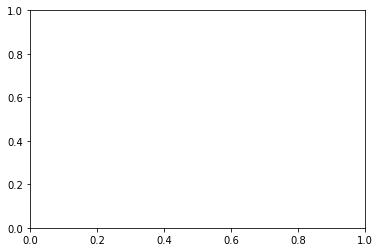

In [98]:
seg2['dias'].hist()

In [ ]:
seg['dias'] = (seg.sort_values(by=['piloto','codigofamiliar','FECHA DE GESTION'], ascending=True)\
.groupby(['piloto','ano','mes_nombre','IDENTIFICACIÃ³N'])['FECHA DE GESTION'].diff())

In [ ]:
base['dias'] = (base.sort_values(by=['piloto','codigofamiliar','fechafinal'], ascending=True)
.groupby(['piloto','ano','mes_nombre','codigofamiliar'])['fecha'].diff())
base['dias']= base['dias'].astype(str)
dias = base['dias'].str.split(' ',1,expand= True)
base['dias'] = dias[0]
base['dias']= pd.DataFrame.from_dict(base['dias']).replace("nan", value=None).astype(float)
base['diasG'] = pd.cut(x=base['dias'], bins=[0,1, 2, 3, 7,14,21,30])
base = base.where(pd.notnull(base), None)
base

In [15]:
cant_seg.head(10)

,llave,DESCRIPCION DE GESTION RESULTADO,IDENTIFICACIÃ³N
0,7178787613722903,SE ENVIA CUPON DE PAGOSE ENVIA CUPON DE PAGOSE...,33
1,815091414918435,SE ENVIA CUPON DE PAGONO CONTESTAN / OCUPADOSE...,32
2,716693587337382,SE DEJO MENSAJE EN BUZONSE ENVIA CUPON DE PAGO...,31
3,3310830815846009,SE ENVIA CUPON DE PAGOSE ENVIA CUPON DE PAGOSE...,31
4,112841973815531425,NO CONTESTAN / OCUPADOSE ENVIA CUPON DE PAGOSE...,29
5,7876179415384088,NO CONTESTAN / OCUPADOSE ENVIA CUPON DE PAGONO...,29
6,90109166215006717,NO CONTESTAN / OCUPADOSE DEJO MENSAJE EN BUZON...,29
7,302326345560610,SE DEJO MENSAJE EN BUZONSE ENVIA CUPON DE PAGO...,28
8,9006954967288467,NO CONTESTAN / OCUPADONO CONTESTAN / OCUPADONO...,28
9,82900110315061723,NO CONTESTAN / OCUPADOSE DEJO MENSAJE CON TERC...,27


In [ ]:
seg.head()

In [ ]:
seg[seg['IDENTIFICACIÃ³N']=='1020848505']

In [ ]:
seg['# DE SUSCRIPCION'].nunique()

In [ ]:
seg['CLASE DE GESTION'].value_counts()

In [ ]:
seg[seg['IDENTIFICACIÃ³N'].duplicated()].head()

In [ ]:
seg.groupby(['IDENTIFICACIÃ³N','FECHA DE GESTION'])

In [ ]:

def tiempo(base):
    """
    Transforma el valor de las columnas recibidas en port en porcentace.
    :param: base: Base de datos(MensualRellamadas)

    """
    #### Data tiempo entre contactos ### 
    try :
        base = base.reset_index(drop=True)
        base1= base[(base['mes'] == int(mes))]
        base1['dias'] = (base1.sort_values(by=['piloto','ani','fechafinal'], ascending=True).groupby(['piloto','mes_nombre','ani'])['fecha'].diff())

In [ ]:
base1['dias'] = (base1.sort_values(by=['piloto','IDENTIFICACIÃ','FECHA DE GESTION'], ascending=True).groupby(['piloto','mes_nombre','ani'])['fecha'].diff())

In [ ]:
new = (seg.groupby('IDENTIFICACIÃ³N')
         .agg({"DESCRIPCION DE GESTION RESULTADO": np.array, "DESCRIPCION DE GESTION RESULTADO": "sum",'IDENTIFICACIÃ³N':'sum'})
         .reset_index()
         )

In [ ]:
new.sample(50)

In [ ]:
seg.groupby(['DESCRIPCION DE GESTION RESULTADO','IDENTIFICACIÃ³N']).agg({'IDENTIFICACIÃ³N':'count'})

In [ ]:
seg['CONSECUTIVO TRASLADO'].unique()

In [ ]:
seg.shape

In [ ]:
seg['IDENTIFICACIÃ³N'].nunique()

In [ ]:
import plotly.express as px

In [ ]:
full2['Tipo De Documento'].fillna('SIN REGISTRO',inplace=True)

In [ ]:
fig = px.bar(full2, x="Efectivo Pago", y="Tipo de Cliente", color="Tipo De Documento", title="")

In [ ]:
fig.show()

In [ ]:
fig = px.sunburst(
    activos,
    path=['nuevotipo', 'cargo'],
    values='Meses_desde_ingreso',
)
fig

In [ ]:
activos_x_cc=activos.groupby(['c2_nombre_centro_costo','nuevotipo']).agg({'cedula':'nunique'}).rename(columns={'cedula':'Cantidad'})
activos_x_cc.style.background_gradient(cmap='Blues',axis = 0).format("{:.0f}")